# Lab Assignment Five: Wide and Deep Network Architectures

### TEAM MEMBERS: Catherine Magee, Morgan Mote, Luv Patel

>In this lab, you will select a prediction task to perform on your dataset, evaluate two different deep learning architectures and tune hyper-parameters for each architecture. If any part of the assignment is not clear, ask the instructor to clarify. This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.

## Dataset Selection

>- Select a dataset similarly to lab one. That is, the dataset must be table data. In terms of generalization performance, it is helpful to have a large dataset for building a wide and deep network. It is also helpful to have many different categorical features to create the embeddings and cross-product embeddings. It is fine to perform binary classification, multi-class classification, or regression.

## Wide_Deep Grading Rubric

#### Preparation (4 points total)
>- [1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 
>- [1 points] Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed). 
>- [1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.
>- [1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 
#### Modeling (5 points total)
>- [2 points] Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.
>- [2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly. 
>- [1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.  
#### Exceptional Work (1 points total)
>- 5000 students: You have free reign to provide additional analyses.
One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.

## Criteria - Long Descriptions

#### Preprocessing
>Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

#### Crossed Groups
>Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

#### Evaluation Metric
>Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

#### Splitting Data
>Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

#### Three Wide / Deep Models
>Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.

#### Deep Layers
>Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly.

#### MLP Comparison
>Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). For classification tasks, use the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations. Use proper statistical method to compare the performance of different models.

#### Exceptional Credit
>Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). For classification tasks, use the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations. Use proper statistical method to compare the performance of different models.

In [1]:
!pip install imbalanced-learn

In [2]:
!pip install tensorflow

In [248]:
!pip install pydot

In [3]:
import os
import textwrap
import itertools
from IPython.display import display, HTML, Markdown
import platform
import subprocess

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Imbalanced-Learn
from imblearn.over_sampling import SMOTE

# Sklearn
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    make_scorer,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models
from tensorflow.keras.layers import (
    Dense,
    Activation,
    Input,
    Embedding,
)
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Dataset and Class Variables

In [4]:
# Prints Tensorflow and Keras version
os.environ['KMP_DUPLICATE_LIB_OK']='True'
print(f"Tensorflow Version: {tf.__version__}")
#print(f"Keras Version: {keras.__version__}")

Tensorflow Version: 2.14.0


Data Source URL:
https://console.cloud.google.com/marketplace/details/usafacts-public-data/covid19-us-cases?filter=solution-type:dataset&filter=category:covid19&id=3eaff9c5-fbaf-47bb-a441-89db1e1395ab&project=still-nebula-398202

In [8]:
# Reads data into memory
df = pd.read_csv("./COVID-19_cases_plus_census_lab5.csv")

In [9]:
def print_df_list_of_features():
    columns = df.columns.to_list()
    features = "Features: "
    for i, col in enumerate(columns):
        if i > 0:
            features += f', "{col}"'
        else:
            features += f'"{col}"'
    print(features)

print_df_list_of_features()

Features: "county_fips_code", "county_name", "state", "state_fips_code", "date", "confirmed_cases", "deaths", "geo_id", "nonfamily_households", "family_households", "median_year_structure_built", "rent_burden_not_computed", "rent_over_50_percent", "rent_40_to_50_percent", "rent_35_to_40_percent", "rent_30_to_35_percent", "rent_25_to_30_percent", "rent_20_to_25_percent", "rent_15_to_20_percent", "rent_10_to_15_percent", "rent_under_10_percent", "total_pop", "male_pop", "female_pop", "median_age", "white_pop", "black_pop", "asian_pop", "hispanic_pop", "amerindian_pop", "other_race_pop", "two_or_more_races_pop", "not_hispanic_pop", "commuters_by_public_transportation", "households", "median_income", "income_per_capita", "housing_units", "vacant_housing_units", "vacant_housing_units_for_rent", "vacant_housing_units_for_sale", "median_rent", "percent_income_spent_on_rent", "owner_occupied_housing_units", "million_dollar_housing_units", "mortgaged_housing_units", "families_with_young_childre

In [10]:
# Prints the size of the dataframe to output
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.\n")

The dataset contains 3142 rows and 259 columns.



In [11]:
# Filter rows with confirmed_cases > 0
df = df[df['confirmed_cases'] > 0].copy()

# Calculate rates per 1000 people 
# Rate calculation added as new attributes
df['cases_per_1000'] = (df['confirmed_cases'] / df['total_pop']) * 1000
df['deaths_per_1000'] = (df['deaths'] / df['total_pop']) * 1000
df['death_per_case'] = df['deaths'] / df['confirmed_cases']

# Sort the DataFrame by confirmed_cases in descending order
df = df.sort_values(by='confirmed_cases', ascending=False)

In [12]:
# Select important attributes
selected_columns = ['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop', 'median_income', 
                    'median_age', 'cases_per_1000', 'deaths_per_1000', 'death_per_case', 'female_pop', 'male_pop']
df = df[selected_columns]

In [13]:
def get_feature_col_counts():
    cols = ['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop', 'median_income', 
                    'median_age', 'cases_per_1000', 'deaths_per_1000', 'female_pop', 'male_pop']
    print(f"{' Value Counts '.center(40, '*')}\n")
    for col in cols:
        print(df[col].value_counts(), "\n")
    print(f"{''.center(40, '*')}")

get_feature_col_counts()

************* Value Counts *************

Washington County      30
Jefferson County       25
Franklin County        24
Lincoln County         23
Jackson County         22
                       ..
Wapello County          1
Webster Parish          1
Carteret County         1
San Patricio County     1
Loving County           1
Name: county_name, Length: 1875, dtype: int64 

TX    254
GA    159
VA    133
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
PA     67
AL     67
FL     67
SD     66
CO     64
LA     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
UT     29
AK     27
MD     24
WY     23
NJ     21
NV     17
ME     16
AZ     15
MA     14
VT     14
NH     10
CT      8
RI      5
HI      4
DE      3
DC      1
Name: state, dtype: int64 

1147    5
632     4
114     4
990     4
232     4
       ..
4554    1
4544    1
4543  

In [14]:
# Prints the unique values for categorical data
columns = df.columns.to_list()
for column in columns:
    unique_vals = list(df[column].unique())
    if len(unique_vals) < 10:
        print(f"{column}: {unique_vals}")
print()

In [15]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(str(missing_values)+ "\n")

print("These are the columns with missing data:" + str(df.columns[df.isnull().any()].tolist()))

Missing Values:
county_name        0
state              0
confirmed_cases    0
deaths             0
total_pop          0
median_income      0
median_age         0
cases_per_1000     0
deaths_per_1000    0
death_per_case     0
female_pop         0
male_pop           0
dtype: int64

These are the columns with missing data:[]


<AxesSubplot:>

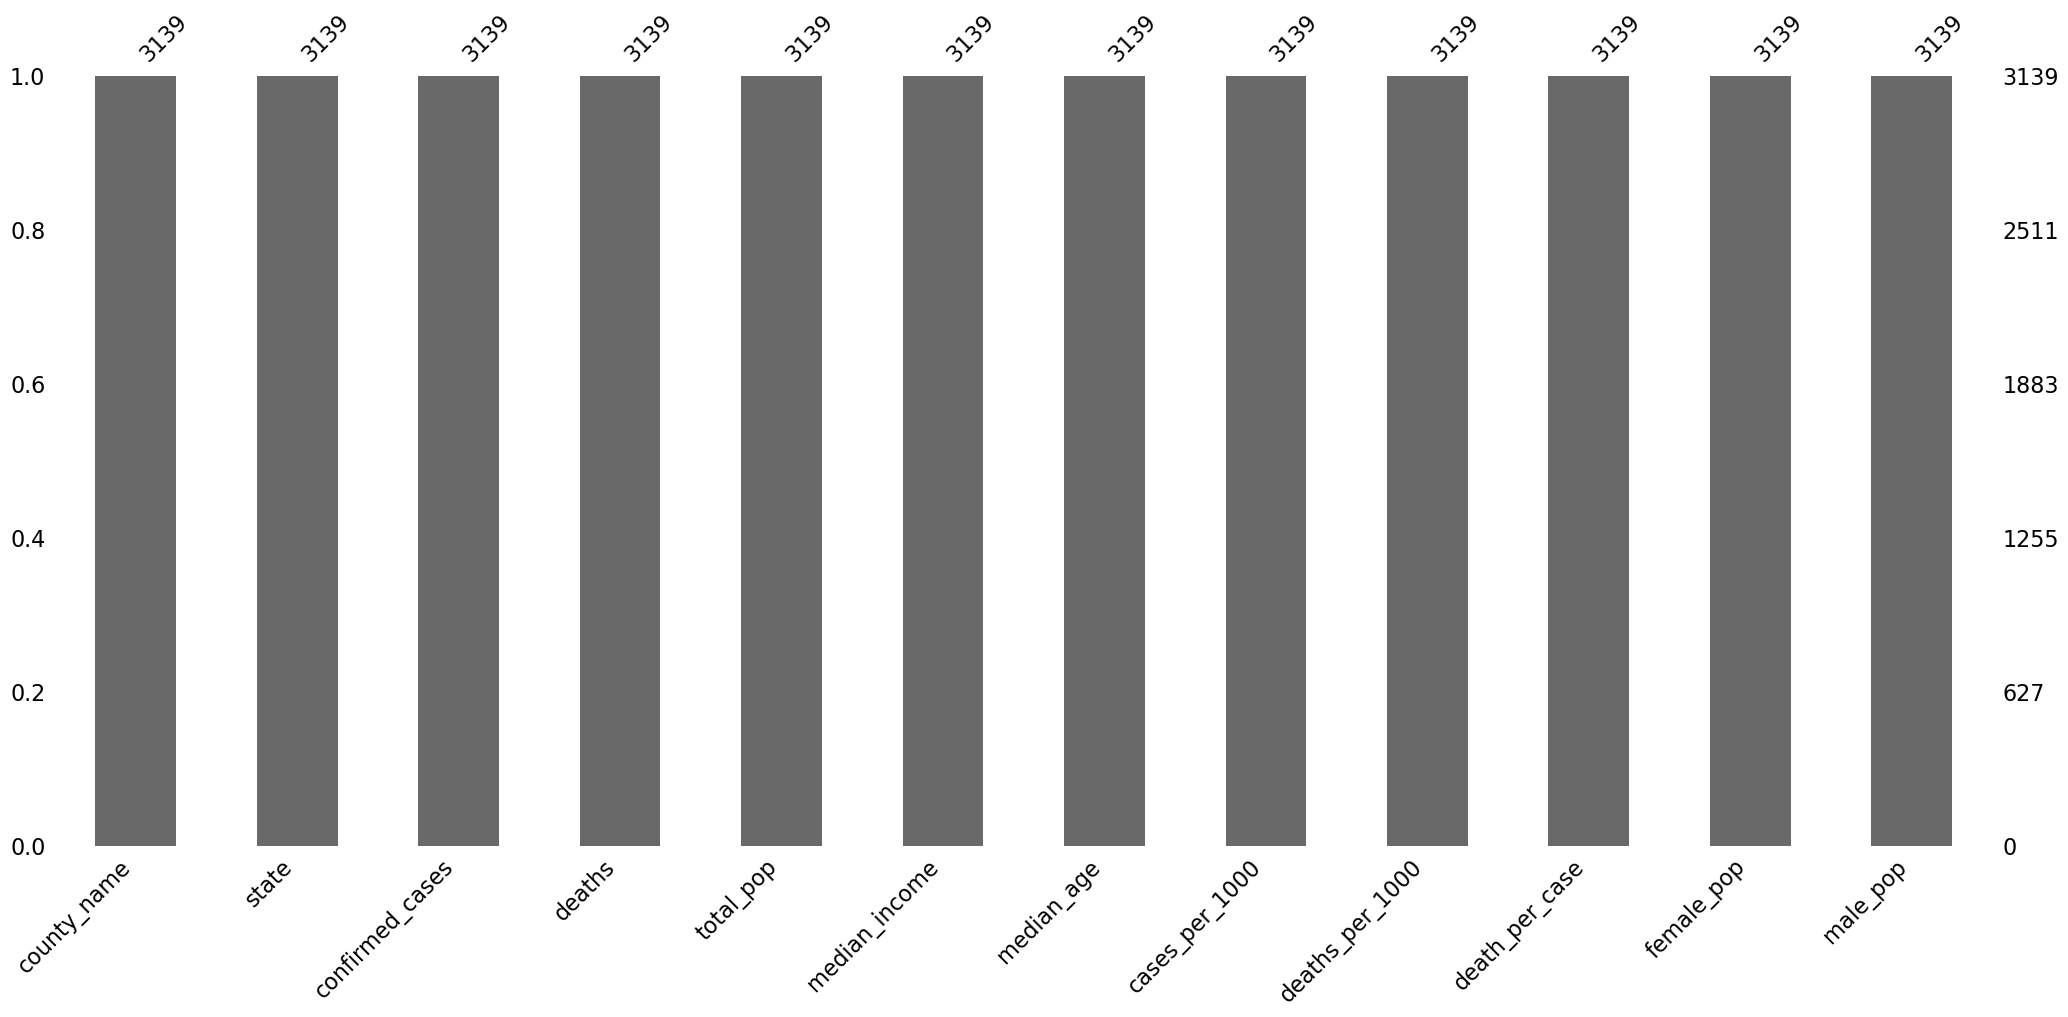

In [16]:
import missingno as msno

msno.bar(df)

In [17]:
def check_for_duplicate_entries():
    return df.duplicated().any()


print(
    "Duplicates Found!"
) if check_for_duplicate_entries() is True else print("No Duplicates Found!")

No Duplicates Found!


In [18]:
# Prints the datatypes for each column
print("Datatypes")
print(df.dtypes)

Datatypes
county_name         object
state               object
confirmed_cases      int64
deaths               int64
total_pop          float64
median_income      float64
median_age         float64
cases_per_1000     float64
deaths_per_1000    float64
death_per_case     float64
female_pop         float64
male_pop           float64
dtype: object


In [19]:
# Provide summary information on continuous variables
print(df.describe())

       confirmed_cases        deaths     total_pop  median_income  \
count     3.139000e+03   3139.000000  3.139000e+03    3139.000000   
mean      7.566138e+03    124.945524  1.022627e+05   49736.142083   
std       2.811232e+04    481.075014  3.284340e+05   13145.573334   
min       1.000000e+00      0.000000  7.400000e+01   19264.000000   
25%       7.985000e+02     12.000000  1.097100e+04   41120.000000   
50%       1.917000e+03     32.000000  2.571400e+04   48038.000000   
75%       4.955500e+03     77.000000  6.752450e+04   55758.000000   
max       1.002614e+06  13936.000000  1.010572e+07  129588.000000   

        median_age  cases_per_1000  deaths_per_1000  death_per_case  \
count  3139.000000     3139.000000      3139.000000     3139.000000   
mean     41.148901       76.850959         1.336791        0.017567   
std       5.372906       28.503892         0.922729        0.011150   
min      21.600000        2.461564         0.000000        0.000000   
25%      37.900000     

# Cross-Product Features

https://krishnayogi.medium.com/the-power-of-feature-crosses-real-life-use-cases-and-code-af7b47218444

"Feature crosses involve the combination of two or more individual features to create new 
synthetic features." These newly formed features show the relationship between the original features, 
"allowing the model to capture non-linear patterns that might be missed by considering the features 
in isolation." There are many ways to create different feature crosses in the cells below you can see 
our group performed a feature cross by multiplying the values of two features and by mulitplying the 
values of three and five features. More specifically we did four feature crosses one two feature cross 
between confirmed cases and deaths. Two three feature crosses one between total population, median age
and cases per 1000 and the other between total population median age and deaths per 1000. The fourth 
feature cross we did was between female population, male population, median income, confirmed cases,
and deaths. 

Since the cause of positive COVID19 cases is unknown to scientist we used our best assumption of what 
features synergy could create a new informative and predictive feature. We chose confirmed cases and deaths
to provide further insight into the relationship between confirmed casese and death. Next we chose to cross 
the total population median age and the cases per 1000 value. In doing this we hoped to discover an 
informative feature that can explain why certain age groups can lead to higher rates of positive COVID19 
cases. Similar to the cross between total population, median age, and cases per 1000 we looked at the 
relationship between total population median age and deaths per 1000. In doing this we hope to discover
a predicitve feature about what age in the population is most likely to die from COIVD19. Lastly we did a 
feature cross between female/male population, median age, median income, confirmed cases, and deaths to 
hopefully uncover an informative feature on the synergy between gender, income, and death by COVID19. 
Since there are no known causes of death from COVID19 we had to use our best assumption to decide which 
crossed features would provide the most insightful disovery. 

In [48]:
# Defines cross columns. Very little is known to the team about what
# contributes to heart disease. Using our best assumptions, these features
# appear sufficiently related for cross analysis.
x_col_list_1 = ['confirmed_cases', 'deaths']
x_col_list_2 = ['total_pop', 'median_age', 'cases_per_1000']
x_col_list_3 = ['total_pop', 'median_age', 'deaths_per_1000']
x_col_list_4 = ['female_pop', 'male_pop', 'median_income', 'confirmed_cases', 'deaths']
x_cols = [x_col_list_1] + [x_col_list_2] + [x_col_list_3] + [x_col_list_4]

In [49]:
# Copies original dataframe
df_cross = df.copy()

In [50]:
# Re-defines feature 'deaths' to be a string value for crossing
df_cross['deaths'] = df_cross['deaths'].apply(lambda v: "Y" if v == 1 else "N")

In [51]:
# Defines encoder for cross labeling
encoder = LabelEncoder()

In [52]:
# Defines a placeholder for cross column names
x_col_features = []

In [54]:
# # Applies column crossing
# for cols in x_cols:
#     # Creates crossed labels
#     cross_col = df_cross[cols].apply(lambda c: '_'.join(c), axis=1)
    
#     # Formats column name
#     col_name = '_'.join(cols)
        
#     # Encodes values as integers
#     encoder.fit(cross_col)
#     new_cross_col = encoder.transform(cross_col)
    
#     # Inserts new column into dataframe
#     df_cross[col_name] = new_cross_col
    
#     # Appends to list
#     x_col_features.append(col_name)

In [56]:
# Applies column crossing
for cols in x_cols:
    # Ensures that all values are strings for joining
    cross_col = df_cross[cols].astype(str).apply(lambda x: '_'.join(x), axis=1)

    # Formats column name
    col_name = '_X_'.join(cols)  # Adding X to indicate a cross

    # Encodes values as integers
    df_cross[col_name] = encoder.fit_transform(cross_col)
    
    # Appends to list
    x_col_features.append(col_name)


In [57]:
# Feature re-assignment to move the target variable to the last column
tmp_features = df_cross.loc[:, ~df_cross.columns.isin(['deaths_per_1000'])]
tmp_target = df_cross['deaths_per_1000']
df_cross = tmp_features
df_cross['deaths_per_1000'] = tmp_target

In [58]:
# Displays updated dataframe with crossed features
df_cross

,county_name,state,confirmed_cases,deaths,total_pop,median_income,median_age,cases_per_1000,death_per_case,female_pop,male_pop,confirmed_cases_X_deaths,total_pop_X_median_age_X_cases_per_1000,total_pop_X_median_age_X_deaths_per_1000,female_pop_X_male_pop_X_median_income_X_confirmed_cases_X_deaths,deaths_per_1000
287,Los Angeles County,CA,1002614,N,10105722.0,61015.0,36.0,99.212506,0.013900,5126081.0,4979641.0,2,16,16,2218,1.379021
832,Cook County,IL,435888,N,5238541.0,59426.0,36.4,83.207901,0.019601,2697837.0,2540704.0,1664,2288,2288,1379,1.630988
245,Maricopa County,AZ,425844,N,4155501.0,58580.0,36.0,102.477174,0.015130,2100037.0,2055464.0,1644,1993,1993,1038,1.550475
430,Miami-Dade County,FL,347965,N,2702602.0,46338.0,39.5,128.751847,0.013283,1390605.0,1311997.0,1433,1405,1405,479,1.710204
2782,Harris County,TX,286356,N,4525519.0,57791.0,33.1,63.275836,0.013357,2274459.0,2251060.0,1173,2108,2108,1148,0.845207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Hinsdale County,CO,15,N,820.0,53056.0,57.2,18.292683,0.000000,436.0,384.0,530,2868,2868,2000,0.000000
1678,Petroleum County,MT,11,Y,453.0,46429.0,51.7,24.282561,0.090909,218.0,235.0,216,2109,2109,1097,2.207506
2543,King County,TX,11,N,289.0,56964.0,32.7,38.062284,0.000000,139.0,150.0,215,1502,1502,476,0.000000
1981,Harding County,NM,8,N,546.0,35096.0,58.4,14.652015,0.000000,255.0,291.0,2453,2344,2344,1302,0.000000


In [59]:
# Defines a new dataframe with normalized and labeled features.
# Other tasks assigned later require joining columns and then encoding
# then, such as when using feature crossing.
df_processed = df_cross.copy()

In [60]:
# Defines the continuous features
continuous_features = ['median_age',
                       'median_income',
                       'confirmed_cases',
                       'cases_per_1000',
                       'death_per_case',]

In [61]:
# Normalize the continuous features
scaler = StandardScaler()
for column in continuous_features:
    xfrm_column = scaler.fit_transform(df_processed[[column]])
    df_processed[column] = xfrm_column

In [62]:
# Defines the categorical features
categorical_features = ['county_name',
                        'state']

In [63]:
# # Encode the categorical features 
# encoder = LabelEncoder()
# for column in categorical_features:
#     xfrm_column = encoder.fit_transform(df_processed[column])
#     df_processed[column] = xfrm_column

In [64]:
# Initialize a dictionary to hold the encoders
encoder_dict = {}

# Encode the categorical features 
for column in categorical_features:
    # Create a new encoder for the column
    encoder = LabelEncoder()
    # Fit and transform the column data
    df_processed[column] = encoder.fit_transform(df_processed[column])
    # Store the encoder in the dictionary
    encoder_dict[column] = encoder


In [65]:
# Describe dataframe after normalization and label encoding.
df_processed.describe().round(2)

,county_name,state,confirmed_cases,total_pop,median_income,median_age,cases_per_1000,death_per_case,female_pop,male_pop,confirmed_cases_X_deaths,total_pop_X_median_age_X_cases_per_1000,total_pop_X_median_age_X_deaths_per_1000,female_pop_X_male_pop_X_median_income_X_confirmed_cases_X_deaths,deaths_per_1000
count,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.0,3139.0,3139.0,3139.00
mean,937.94,26.04,-0.00,102262.73,-0.00,-0.00,-0.00,0.00,51922.56,50340.18,1278.04,1569.0,1569.0,1569.0,1.34
std,526.21,14.18,1.00,328434.05,1.00,1.00,1.00,1.00,167217.54,161254.58,746.18,906.3,906.3,906.3,0.92
min,0.00,0.00,-0.27,74.00,-2.32,-3.64,-2.61,-1.58,35.00,39.00,0.00,0.0,0.0,0.0,0.00
25%,489.50,14.00,-0.24,10971.00,-0.66,-0.60,-0.64,-0.65,5478.50,5523.00,622.50,784.5,784.5,784.5,0.68
50%,939.00,25.00,-0.20,25714.00,-0.13,0.01,-0.05,-0.19,12887.00,12813.00,1279.00,1569.0,1569.0,1569.0,1.19
75%,1376.00,40.00,-0.09,67524.50,0.46,0.57,0.57,0.48,34115.00,33537.00,1927.50,2353.5,2353.5,2353.5,1.75
max,1874.00,50.00,35.40,10105722.00,6.08,4.70,8.40,14.73,5126081.00,4979641.00,2563.00,3138.0,3138.0,3138.0,8.36


In [66]:
# Visualizing any missing values
na_counts = df_processed.isna().sum()
header = textwrap.dedent("""\
    | Feature | Missing Count |
    |---------|---------------|\
""")
rows = "\n".join("| {} | {} |".format(col, na_counts[col]) for col in na_counts.index)
table = f"{header}\n{rows}"

display(Markdown(f"### NA/NaN/Missing Data Counts\n{table}"))

### NA/NaN/Missing Data Counts
| Feature | Missing Count |
|---------|---------------|
| county_name | 0 |
| state | 0 |
| confirmed_cases | 0 |
| deaths | 0 |
| total_pop | 0 |
| median_income | 0 |
| median_age | 0 |
| cases_per_1000 | 0 |
| death_per_case | 0 |
| female_pop | 0 |
| male_pop | 0 |
| confirmed_cases_X_deaths | 0 |
| total_pop_X_median_age_X_cases_per_1000 | 0 |
| total_pop_X_median_age_X_deaths_per_1000 | 0 |
| female_pop_X_male_pop_X_median_income_X_confirmed_cases_X_deaths | 0 |
| deaths_per_1000 | 0 |

# Managing Data Imbalance

https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In the cells below you can see our dataframe has a small class imbalence. To solve this we used SMOTE. 
SMOTE stands for synthetic minority oversampling technique and it "aims to balance class distribution by 
randomly increasing minority class examples by replicating them." Further it "generates the virtual training 
records by linear interpolation for the minority class." These records are generated by randomly selecting
one or more k-nearest neighbors. Once the oversampling process is complete the data has been reconstructed 
to be balenced and now classification models can be successfully run!

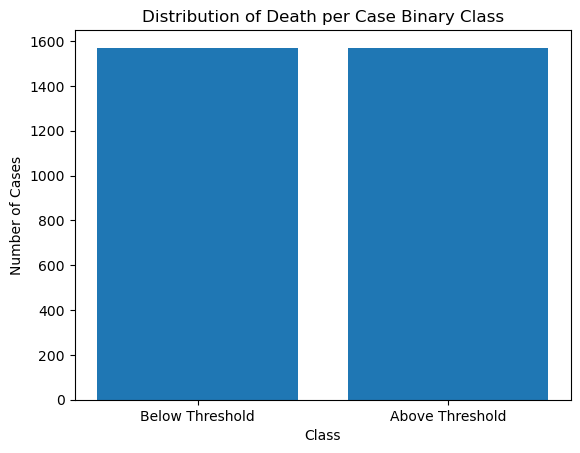

In [130]:
# # Visualizes deaths_per_case class to check for class imbalance.
# plt.bar([0, 1], np.bincount(df_processed['death_per_case']))
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.title("Distribution of Death per Case")
# plt.show()

# Convert 'death_per_case' to binary (assuming 'death_per_case' is not already binary)
# Compute the median value of 'death_per_case'
threshold = df_processed['death_per_case'].median()

# Binarize 'death_per_case' based on the threshold
df_processed['death_per_case_binary'] = (df_processed['death_per_case'] > threshold).astype(int)

class_counts = np.bincount(df_processed['death_per_case_binary'])

# Plot the distribution
plt.bar([0, 1], class_counts)
plt.xticks([0, 1], ['Below Threshold', 'Above Threshold'])
plt.title("Distribution of Death per Case Binary Class")
plt.ylabel('Number of Cases')
plt.xlabel('Class')
plt.show()


In [131]:
# print(df_processed.dtypes)

In [132]:
# Class imbalance solved through SMOTE
from imblearn.over_sampling import SMOTE

# Convert 'Y' to 1 and 'N' to 0 in the 'deaths' column
df_processed['deaths'] = df_processed['deaths'].apply(lambda x: 1 if x == 'Y' else 0)

# Now, split your data into features and target again, ensuring all features are numeric
X = df_processed.loc[:, df_processed.columns != 'death_per_case_binary']
y = df_processed['death_per_case_binary']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print('Before SMOTE:', np.bincount(y_train))
print('After SMOTE:', np.bincount(y_train_res))


Before SMOTE: [1256 1255]
After SMOTE: [1256 1256]


In [133]:
# Returns balanced features and target after using SMOTE resampling to balance the classes.
smote = SMOTE(random_state=123)
features = df_processed.loc[:, df_processed.columns != 'death_per_case_binary']
target = df_processed['death_per_case_binary']
features, target = smote.fit_resample(features, target)

##### MSE to Evaluate our Performance

https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3#:~:text=The%20Mean%20Squared%20Error%20(MSE,out%20across%20the%20whole%20dataset.

The calcuation of MSE is done by taking "the differnce between your model’s predictions and the ground truth, square it, and average it out across the whole dataset." By calculating the MSE value we ensure that our model is free of any outlier prediction that will cause errors. In the output cell below you can see the increase from the training and testing value. This shows that there could be some degree of overfitting. Overfitting can be caused by our model learning the data too well which results in poor performance on unseen data. 

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dropping non-relevant columns for regression analysis
# You would also drop 'deaths' if it's not relevant as a binary feature for regression
regression_df = df_processed.drop(['deaths', 'death_per_case_binary'], axis=1)

# Handling any missing values if necessary
regression_df.fillna(regression_df.mean(), inplace=True)

# Now we will split the data into features and target
X = regression_df.drop('deaths_per_1000', axis=1)
y = regression_df['deaths_per_1000']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Predict on the training data and the test set
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate the mean squared error for the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# If you want to view the coefficients of the regression
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Training MSE: 0.09327898838551306
Test MSE: 0.1954830708980363
                                                     Coefficient
county_name                                        -6.445779e-06
state                                              -5.597686e-05
confirmed_cases                                    -4.275665e-02
total_pop                                           5.788808e-08
median_income                                      -4.246777e-03
median_age                                          9.812615e-03
cases_per_1000                                      4.594187e-01
death_per_case                                      7.881618e-01
female_pop                                         -4.266533e-07
male_pop                                            4.845368e-07
confirmed_cases_X_deaths                           -3.546419e-06
total_pop_X_median_age_X_cases_per_1000            -3.161689e-01
total_pop_X_median_age_X_deaths_per_1000            3.161672e-01
female_pop_X_male_pop_X_med

##### Visualization of SMOTE Results

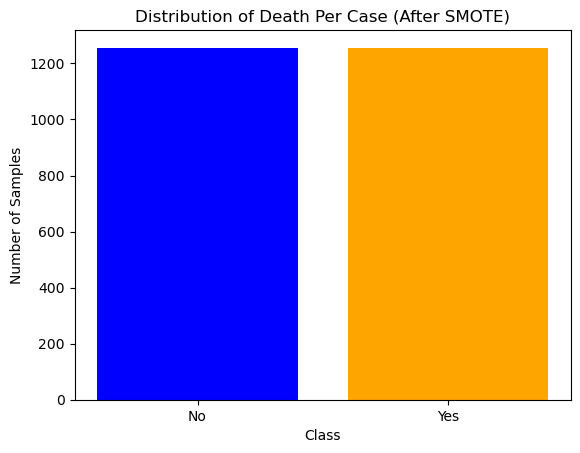

In [135]:
# Assuming y_train_res is the target array after SMOTE
class_distribution = np.bincount(y_train_res)
classes = [0, 1]

# Visualizes balanced death_per_case class after using SMOTE
plt.bar(classes, class_distribution, color=['blue', 'orange'])
plt.xticks(classes, ['No', 'Yes'])
plt.title("Distribution of Death Per Case (After SMOTE)")
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


In [136]:
# Returns training and testing data splits for regression (without stratification).
x_train, x_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=123,
)

In [137]:
# # Assuming 'deaths' is a categorical column and needs to be one-hot encoded
# if 'deaths' not in categorical_features:
#     categorical_features.append('deaths')

# # Now, set up your column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), categorical_features),  # use the updated categorical_features list
#     ],
#     remainder='passthrough'  # don't apply any transformation to the rest of the columns
# )

# # Apply the transformation to your features
# features_processed = preprocessor.fit_transform(features)
# # To get new feature names after transformation
# feature_names = preprocessor.get_feature_names_out()

# target = target.astype('int')

# Basic Keras Model w/ Stratification

https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3#:~:text=The%20Mean%20Squared%20Error%20(MSE,out%20across%20the%20whole%20dataset.

In the cells below we created a basic logistic regression model using F1-score as the metric. 
In creating a basic keras model we can grasp a sense for how our model may perform. 

Since our dataframe is relatively small, we used StratifiedKFold for the cross validation component. "In 
StratifiedKFold,the dataset is divided into k subsets or folds, where each fold maintains the same
proportion of the different target classes as the original dataset." We also used StratifiedKFold because
it ensures that our training and testing sets in each fold have a similar class distribution thus making the 
"evaulation more reliable and accurate." 

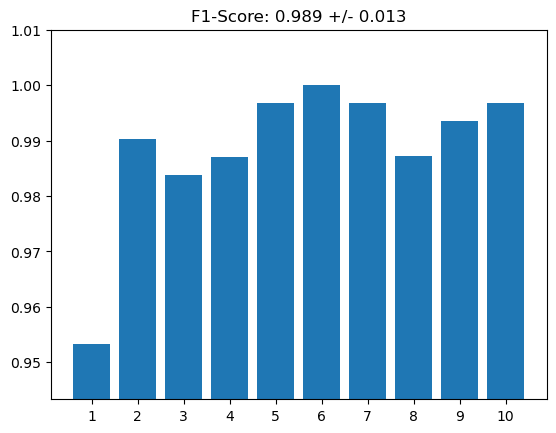

KeyError: "['deaths'] not in index"

In [140]:
# Creates a basic model using logistic regression using the F1-score
# as the metric. Since the dataset is relatively small, we used
# StratifiedKFold since it performs well under these types of conditions.
# This strategy is appropriate since it relates to a real-world
# situation.

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# # Define which columns should be encoded vs scaled
# categorical = categorical_features
# continuous = continuous_features

# # Create a column transformer with encoders for the categorical columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(drop='if_binary'), categorical),
#     ],
#     remainder='passthrough'  # Continuous features don't need to be transformed
# )

# # Apply transformation to feature data
# features_processed = preprocessor.fit_transform(x_train)

# # Selects a model
# model = LogisticRegression(penalty="l2", random_state=123)

# # Selects cross validation
# cross_validation = StratifiedKFold(n_splits=10)

# # Determines evaluation criteria
# scorer = make_scorer(f1_score)

# # Runs model with cross-validation
# scored_model = cross_val_score(
#     estimator=model,
#     X = features_processed,  # Make sure to use the preprocessed features here
#     y = y_train,
#     cv = cross_validation,
#     scoring = scorer,
# )


# Plots model
plt.bar([str(num + 1) for num in range(len(scored_model))], scored_model)
plt.ylim([min(scored_model) - 0.01, max(scored_model) + 0.01])
plt.title(f"F1-Score: {scored_model.mean():.3f} +/- {scored_model.std():.3f}")
plt.show()

# Creates a basic model using logistic regression using the F1-score
# as the metric. Since the dataset is relatively small, we used
# StratifiedKFold since it performs well under these types of conditions.
# This strategy is appropriate since it relates to a real-world
# situation. 

# Selects a model
model = LogisticRegression(penalty="l2", random_state=123)

# Selects cross validation
cross_validation = StratifiedKFold(n_splits=10)

# Determines evaluation criteria
scorer = make_scorer(f1_score)

# Runs model with cross validation
scored_model = cross_val_score(
    estimator=model,
    X=features[continuous_features + categorical_features],
    y=target,
    cv=cross_validation,
    scoring=scorer,
)

# Plots model
plt.bar([str(num + 1) for num in range(len(scored_model))], scored_model)
plt.ylim([min(scored_model) - 0.01, max(scored_model) + 0.01])
plt.title(f"F1-Score: {scored_model.mean():.3f} +/- {scored_model.std():.3f}")
plt.show()

In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and 'deaths' is the target column.
# Replace with the actual names of your DataFrame and column.

# Convert continuous target into a binary categorical target
target_binary = np.where(df['deaths'] > 0, 1, 0)

# Prepare the feature space
# Assuming all other columns in df are features
features = df.drop('deaths', axis=1)

# Standardize features (Logistic Regression benefits from feature scaling)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Set up the Logistic Regression model
model = LogisticRegression()

# Set up cross-validation configuration
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the scoring function
f1_scorer = make_scorer(f1_score, average='binary')  # 'binary' is used for binary classification

# Perform cross-validation
cross_val_scores = cross_val_score(model, features_scaled, target_binary, cv=cross_validation, scoring=f1_scorer)

# Print the individual F1 scores
print("F1 Scores for each fold:", cross_val_scores)

# Print the mean F1 score across all folds
print("Average F1 Score:", np.mean(cross_val_scores))

# Optionally, plot the F1 scores for each fold
plt.bar(range(1, len(cross_val_scores) + 1), cross_val_scores)
plt.xlabel('Fold Number')
plt.ylabel('F1 Score')
plt.title('F1 Scores for each fold')
plt.show()


ValueError: could not convert string to float: 'Los Angeles County'

In [142]:
# Creation of the Keras model visualization function.
def plot_confusion_matrix(
    cm,
    target_names,
    title="Confusion matrix",
    cmap=None,
    normalize=True,
    class_results: dict = {},
):
    """
    Given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                "{:0.4f}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    plt.tight_layout()
    plt.ylabel("True label")
    if class_results:
        x_lab = "Predicted label\n\n"
        x_lab += f"accuracy={accuracy:0.4f}\nmisclass={misclass:0.4f}\n"
        for key, value in class_results.items():
            x_lab += f"{key}={value:0.4f}\n"
    else:
        x_lab = "Predicted label\n\n"
        x_lab += f"accuracy={accuracy:0.4f}\nmisclass={misclass:0.4f}\n"
        
    plt.xlabel(x_lab)
    plt.show()

In [143]:
# Creation of the basic model that will be run on the functions above.

# Defines the training data to be used for constructing the model
x_train_for_model = x_train[categorical_features + continuous_features] 
x_test_for_model = x_test[categorical_features + continuous_features]

In [144]:
# Setup the input size
n_features = x_train_for_model.shape[1]
input_tensor = Input(shape=(n_features,))

In [145]:
# Creates dense layers. Dense means a fully connected layer. A layer
# is callable on a tensor.
x = Dense(units=10, activation="relu")(input_tensor)
x = Dense(units=5, activation="tanh")(x)
predictions = Dense(1, activation="sigmoid")(x)

In [146]:
# Creates a model with 1 Input layer and 3 Dense layers
model = Model(inputs=input_tensor, outputs=predictions)

In [147]:
# Compiles the model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.Recall()],
)

In [148]:
# Prints model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
# Fits model to training data
model.fit(x_train_for_model, y_train, epochs=10, batch_size=50, verbose=1)

Epoch 1/10
51/51 [==============================] - 1s 2ms/step - loss: 0.2586 - recall_1: 0.0834
Epoch 2/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2502 - recall_1: 0.0024
Epoch 3/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2498 - recall_1: 0.0024
Epoch 4/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2496 - recall_1: 0.0024
Epoch 5/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2495 - recall_1: 0.0040
Epoch 6/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2494 - recall_1: 0.0040
Epoch 7/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2495 - recall_1: 0.0024
Epoch 8/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2494 - recall_1: 0.0032
Epoch 9/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2493 - recall_1: 0.0024
Epoch 10/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2493 - recall_1: 0.0032


In [150]:
y_predict_proba = model.predict(x_test_for_model)  # sigmoid output probabilities
y_predict = np.round(y_predict_proba)  # round to get binary class

20/20 [==============================] - 0s 1ms/step


In [151]:
# Prints classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       293
           1       0.00      0.00      0.00       335

    accuracy                           0.47       628
   macro avg       0.23      0.50      0.32       628
weighted avg       0.22      0.47      0.30       628



C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


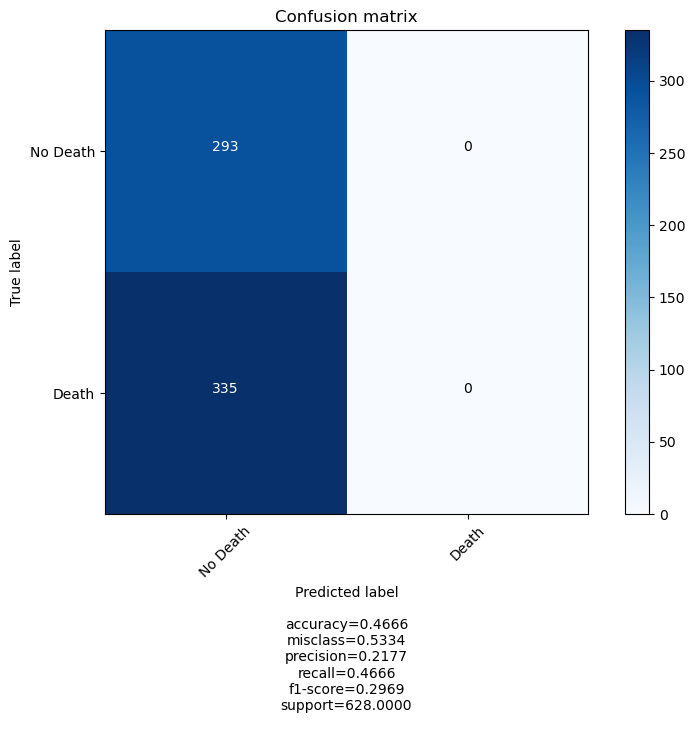

In [152]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Death", "Death"],
    normalize=False,
    class_results = class_report['weighted avg']
)

In [249]:
# Plots the graph
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Wide and Deep Network #1

In [155]:
# Wide and Deep Network #1

# Step 1: Define data that will be used. Data is converted into numpy format.

# x training data for model
mod_x_train_cross = x_train[x_col_features[:2]].to_numpy()
mod_x_train_categorical = x_train[categorical_features].to_numpy()
mod_x_train_continuous = x_train[continuous_features].to_numpy()

# x testing data for model
mod_x_test_cross = x_test[x_col_features[:2]].to_numpy()
mod_x_test_categorical = x_test[categorical_features].to_numpy()
mod_x_test_continuous = x_test[continuous_features].to_numpy()

# Defines final x-train and x-test variables after all layers have been
# evaluated.
mod_x_train = (
    [mod_x_train_cross] + [mod_x_train_categorical] + [mod_x_train_continuous]
)
mod_x_test = (
    [mod_x_test_cross] + [mod_x_test_categorical] + [mod_x_test_continuous]
)

In [156]:
# Step 2: Define the inputs that will be used
input_cross = Input(
    shape=(mod_x_train_cross.shape[1],), dtype="int64", name="inputs_wide"
)
input_categorical = Input(
    shape=(mod_x_train_categorical.shape[1],),
    dtype="int64",
    name="inputs_categorical",
)
input_continuous = Input(
    shape=(mod_x_train_continuous.shape[1],),
    dtype="int64",
    name="inputs_numeric",
)

In [157]:
# Step 3: Define placeholder variables for data input

# Defines outputs
output_cross = []
output_categorical = []
output_continuous = []

# Defines branches
branch_wide = []
branch_deep = []
branch_final = []

In [158]:
# Step 4: Add embeddings for crossed data

# For cross data embeddings...
tmp_train = mod_x_train_cross.T.tolist()
tmp_test = mod_x_test_cross.T.tolist()
tmp_colnames = x_col_features[: mod_x_train_cross.shape[1]]

# Iterates through cross variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_cross, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_cross.append(embedding)

In [159]:
# Step 5: Add embeddings for categorical data

# For categorical embeddings...
tmp_train = mod_x_train_categorical.T.tolist()
tmp_test = mod_x_test_categorical.T.tolist()
tmp_colnames = categorical_features

# Iterates through categorical variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_categorical, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_categorical.append(embedding)

In [160]:
# Step 6: Add layers to wide branch
wide = []
for embedding in output_cross + output_categorical:
    wide.append(embedding)
branch_wide = keras.layers.concatenate(wide, name="wide_concat")

In [161]:
# Step 7: Add layer for continuous (numeric) data

# For continuous features...
# Adds dense layer to continuous input
x_dense = Dense(units=20, activation="relu", name="num_1")(input_continuous)

In [162]:
# Step 8: Add dense layer to deep branch
branch_deep.append(x_dense)

In [163]:
# Step 9: Merge the deep branch layers
branch_deep = keras.layers.concatenate(branch_deep, name="deep_concat")
branch_deep = Dense(units=50, activation="relu", name="deep1")(branch_deep)
branch_deep = Dense(units=30, activation="relu", name="deep2")(branch_deep)
branch_deep = Dense(units=20, activation="relu", name="deep3")(branch_deep)
branch_deep = Dense(units=10, activation="relu", name="deep4")(branch_deep)
branch_deep = Dense(units=5, activation="relu", name="deep5")(branch_deep)

In [164]:
# Step 10: Merge the deep and wide branches
branch_final = keras.layers.concatenate([branch_wide, branch_deep])

In [165]:
# Step 11: Add dense layer to final branch
branch_final = Dense(units=1, activation="sigmoid", name="combined")(
    branch_final
)

In [166]:
# Step 12: Build model
model = Model(
    inputs=[input_cross, input_categorical, input_continuous],
    outputs=branch_final,
)

In [167]:
# Step 13: Compile model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC(from_logits=True)],
)

In [168]:
# Prints the model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs_numeric (InputLayer  [(None, 5)]                  0         []                            
 )                                                                                                
                                                                                                  
 num_1 (Dense)               (None, 20)                   120       ['inputs_numeric[0][0]']      
                                                                                                  
 deep_concat (Concatenate)   (None, 20)                   0         ['num_1[0][0]']               
                                                                                                  
 deep1 (Dense)               (None, 50)                   1050      ['deep_concat[0][0]']   

In [169]:
# Step 14: Fits model to training data
model_history = model.fit(
    mod_x_train,
    y_train,
    epochs=50,
    batch_size=50,
    validation_data=([mod_x_test], y_test),
    verbose=1,
)

Epoch 1/50
51/51 [==============================] - 2s 9ms/step - loss: 0.2478 - recall_2: 0.5870 - auc: 0.5785 - val_loss: 0.2400 - val_recall_2: 0.8388 - val_auc: 0.7083
Epoch 2/50
51/51 [==============================] - 0s 5ms/step - loss: 0.2064 - recall_2: 0.9854 - auc: 0.9375 - val_loss: 0.2082 - val_recall_2: 0.8478 - val_auc: 0.7790
Epoch 3/50
51/51 [==============================] - 0s 5ms/step - loss: 0.1544 - recall_2: 0.9765 - auc: 0.9817 - val_loss: 0.2013 - val_recall_2: 0.6866 - val_auc: 0.7715
Epoch 4/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0985 - recall_2: 0.9935 - auc: 0.9995 - val_loss: 0.1952 - val_recall_2: 0.7403 - val_auc: 0.7794
Epoch 5/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0533 - recall_2: 0.9976 - auc: 1.0000 - val_loss: 0.1962 - val_recall_2: 0.6627 - val_auc: 0.7636
Epoch 6/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0284 - recall_2: 1.0000 - auc: 1.0000 - val_loss: 0.1957 - val_rec

Epoch 48/50
51/51 [==============================] - 0s 4ms/step - loss: 1.0584e-04 - recall_2: 1.0000 - auc: 1.0000 - val_loss: 0.2063 - val_recall_2: 0.7164 - val_auc: 0.7453
Epoch 49/50
51/51 [==============================] - 0s 4ms/step - loss: 1.0066e-04 - recall_2: 1.0000 - auc: 1.0000 - val_loss: 0.2065 - val_recall_2: 0.7164 - val_auc: 0.7449
Epoch 50/50
51/51 [==============================] - 0s 4ms/step - loss: 9.5827e-05 - recall_2: 1.0000 - auc: 1.0000 - val_loss: 0.2066 - val_recall_2: 0.7164 - val_auc: 0.7447


## Wide and Deep Network #1 Visualization

In [170]:
# Defines the y-prediction probability and y-prediction arrays
y_predict_proba = model.predict(mod_x_test)  # sigmoid output probabilities
y_predict = np.round(y_predict_proba)  # round to get binary class

# Prints classification report
print(classification_report(y_test, y_predict))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       293
           1       0.68      0.72      0.70       335

    accuracy                           0.67       628
   macro avg       0.67      0.67      0.67       628
weighted avg       0.67      0.67      0.67       628



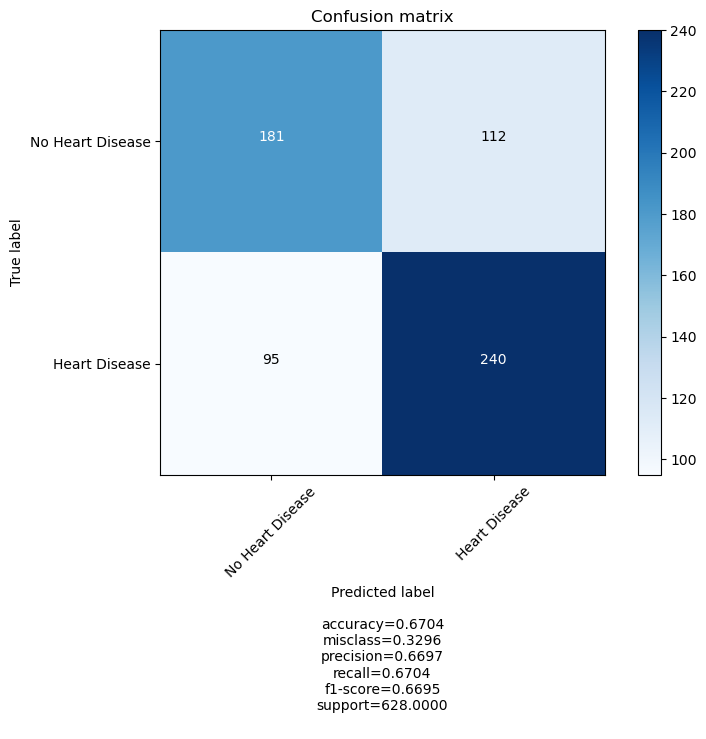

In [171]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Heart Disease", "Heart Disease"],
    normalize=False,
    class_results=class_report["weighted avg"],
)

In [172]:
# Plots the graph
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


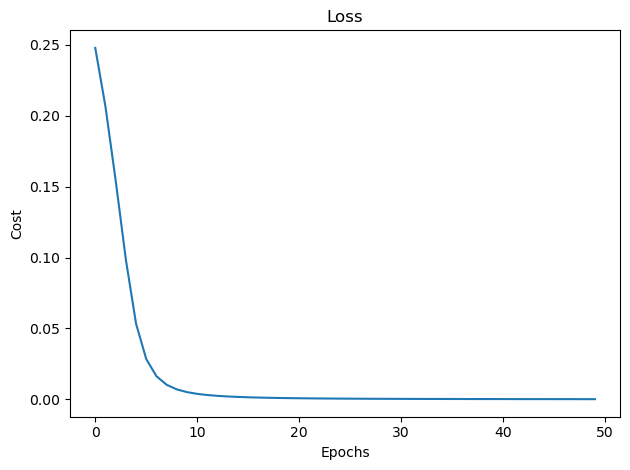

In [173]:
# Variables for determining the loss over epochs
epochs = model_history.epoch
loss = model_history.history["loss"]

# Plots the loss graph
plt.plot(epochs, loss)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Loss")

plt.tight_layout()

plt.show()

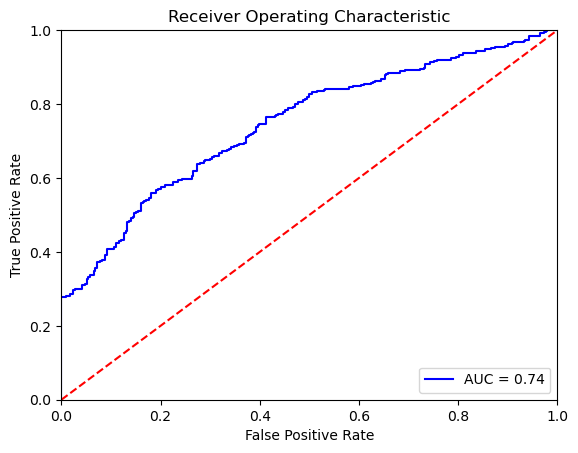

In [174]:
# Variables for determining the ROC/AUC
fpr, tpr, threshold = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

# Plots the ROC and AUC graph
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

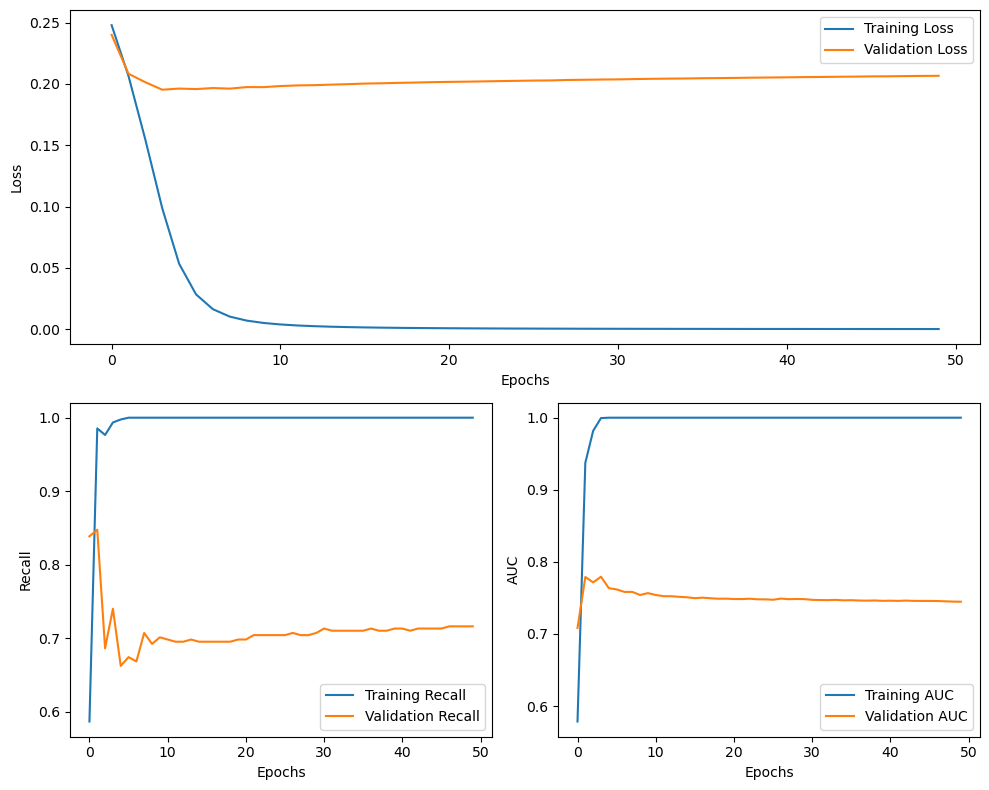

In [175]:
# Model history values
hist_values = list(model_history.history.values())

# Variables for plotting the training versus testing
train_loss   = hist_values[0]
train_recall = hist_values[1]
train_auc    = hist_values[2]
val_loss     = hist_values[3]
val_recall   = hist_values[4]
val_auc      = hist_values[5]

# Plots the training versus testing graph
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, (1, 2))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_recall, label="Training Recall")
plt.plot(val_recall, label="Validation Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_auc, label="Training AUC")
plt.plot(val_auc, label="Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()

plt.tight_layout()

plt.show()

# Wide and Deep Network #2

In [176]:
# Wide and Deep Network #2

# Step 1: Define data that will be used. Data is converted into numpy format.

# x training data for model
mod_x_train_cross = x_train[x_col_features[:3]].to_numpy()
mod_x_train_categorical = x_train[categorical_features].to_numpy()
mod_x_train_continuous = x_train[continuous_features].to_numpy()

# x testing data for model
mod_x_test_cross = x_test[x_col_features[:3]].to_numpy()
mod_x_test_categorical = x_test[categorical_features].to_numpy()
mod_x_test_continuous = x_test[continuous_features].to_numpy()

# Defines final x-train and x-test variables after all layers have been
# evaluated.
mod_x_train = (
    [mod_x_train_cross] + [mod_x_train_categorical] + [mod_x_train_continuous]
)
mod_x_test = (
    [mod_x_test_cross] + [mod_x_test_categorical] + [mod_x_test_continuous]
)

In [177]:
# Step 2: Define the inputs that will be used
input_cross = Input(
    shape=(mod_x_train_cross.shape[1],), dtype="int64", name="inputs_wide"
)
input_categorical = Input(
    shape=(mod_x_train_categorical.shape[1],),
    dtype="int64",
    name="inputs_categorical",
)
input_continuous = Input(
    shape=(mod_x_train_continuous.shape[1],),
    dtype="int64",
    name="inputs_numeric",
)

In [178]:
# Step 3: Define placeholder variables for data input

# Defines outputs
output_cross = []
output_categorical = []
output_continuous = []

# Defines branches
branch_wide = []
branch_deep = []
branch_final = []

In [179]:
# Step 4: Add embeddings for crossed data

# For cross data embeddings...
tmp_train = mod_x_train_cross.T.tolist()
tmp_test = mod_x_test_cross.T.tolist()
tmp_colnames = x_col_features[: mod_x_train_cross.shape[1]]

# Iterates through cross variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_cross, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_cross.append(embedding)

In [180]:
# Step 5: Add embeddings for categorical data

# For categorical embeddings...
tmp_train = mod_x_train_categorical.T.tolist()
tmp_test = mod_x_test_categorical.T.tolist()
tmp_colnames = categorical_features

# Iterates through categorical variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_categorical, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_categorical.append(embedding)

In [181]:
# Step 6: Add embeddings to wide branch
wide = []
for embedding in output_cross + output_categorical:
    wide.append(embedding)
branch_wide = keras.layers.concatenate(wide, name="wide_concat")

In [182]:
# Step 7: Add branch for continuous (numeric) data

# For continuous features...
# Adds dense layer to continuous input
x_dense = Dense(units=20, activation="relu", name="num_1")(input_continuous)
x_dense = Dense(units=10, activation="relu", name="num_2")(x_dense)
x_dense = Dense(units=5, activation="relu", name="num_3")(x_dense)

In [183]:
# Step 8: Add dense layer to deep branch
branch_deep.append(x_dense)

In [184]:
# Step 9: Merge the deep branches
branch_deep = keras.layers.concatenate(branch_deep, name="deep_concat")
branch_deep = Dense(units=50, activation="relu", name="deep1")(branch_deep)
branch_deep = Dense(units=25, activation="relu", name="deep2")(branch_deep)
branch_deep = Dense(units=10, activation="relu", name="deep3")(branch_deep)

In [185]:
# Step 10: Merge the deep and wide branches
branch_final = keras.layers.concatenate([branch_wide, branch_deep])

In [186]:
# Step 10: Add dense layer to final branch
branch_final = Dense(units=1, activation="sigmoid", name="combined")(
    branch_final
)

In [187]:
# Step 11: Build model
model = Model(
    inputs=[input_cross, input_categorical, input_continuous],
    outputs=branch_final,
)

In [188]:
# Step 12: Compile model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC(from_logits=True)],
)

In [189]:
# Prints the model summary
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs_numeric (InputLayer  [(None, 5)]                  0         []                            
 )                                                                                                
                                                                                                  
 num_1 (Dense)               (None, 20)                   120       ['inputs_numeric[0][0]']      
                                                                                                  
 num_2 (Dense)               (None, 10)                   210       ['num_1[0][0]']               
                                                                                                  
 num_3 (Dense)               (None, 5)                    55        ['num_2[0][0]']         

In [190]:
# Step 13: Fits model to training data
model_history = model.fit(
    mod_x_train,
    y_train,
    epochs=50,
    batch_size=50,
    validation_data=([mod_x_test], y_test),
    verbose=1,
)

Epoch 1/50
51/51 [==============================] - 2s 10ms/step - loss: 0.2493 - recall_3: 0.5287 - auc_1: 0.5350 - val_loss: 0.2477 - val_recall_3: 0.6448 - val_auc_1: 0.5814
Epoch 2/50
51/51 [==============================] - 0s 7ms/step - loss: 0.2130 - recall_3: 0.9668 - auc_1: 0.9811 - val_loss: 0.2217 - val_recall_3: 0.8269 - val_auc_1: 0.7717
Epoch 3/50
51/51 [==============================] - 0s 6ms/step - loss: 0.1366 - recall_3: 0.9061 - auc_1: 0.9792 - val_loss: 0.1878 - val_recall_3: 0.6537 - val_auc_1: 0.7924
Epoch 4/50
51/51 [==============================] - 0s 6ms/step - loss: 0.0728 - recall_3: 0.9879 - auc_1: 0.9992 - val_loss: 0.1852 - val_recall_3: 0.5761 - val_auc_1: 0.7961
Epoch 5/50
51/51 [==============================] - 0s 6ms/step - loss: 0.0332 - recall_3: 0.9984 - auc_1: 1.0000 - val_loss: 0.1823 - val_recall_3: 0.7552 - val_auc_1: 0.7945
Epoch 6/50
51/51 [==============================] - 0s 6ms/step - loss: 0.0159 - recall_3: 1.0000 - auc_1: 1.0000 - val

Epoch 47/50
51/51 [==============================] - 0s 5ms/step - loss: 7.4950e-05 - recall_3: 1.0000 - auc_1: 1.0000 - val_loss: 0.1840 - val_recall_3: 0.6925 - val_auc_1: 0.7876
Epoch 48/50
51/51 [==============================] - 0s 5ms/step - loss: 7.1316e-05 - recall_3: 1.0000 - auc_1: 1.0000 - val_loss: 0.1840 - val_recall_3: 0.6925 - val_auc_1: 0.7878
Epoch 49/50
51/51 [==============================] - 0s 5ms/step - loss: 6.7848e-05 - recall_3: 1.0000 - auc_1: 1.0000 - val_loss: 0.1842 - val_recall_3: 0.6866 - val_auc_1: 0.7877
Epoch 50/50
51/51 [==============================] - 0s 5ms/step - loss: 6.4633e-05 - recall_3: 1.0000 - auc_1: 1.0000 - val_loss: 0.1843 - val_recall_3: 0.6866 - val_auc_1: 0.7879


## Wide and Deep Network #2 Visualization

In [191]:
# Defines the y-prediction probability and y-prediction arrays
y_predict_proba = model.predict(mod_x_test)  # sigmoid output probabilities
y_predict = np.round(y_predict_proba)  # round to get binary class

# Prints classification report
print(classification_report(y_test, y_predict))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       293
           1       0.74      0.69      0.71       335

    accuracy                           0.70       628
   macro avg       0.70      0.70      0.70       628
weighted avg       0.70      0.70      0.70       628



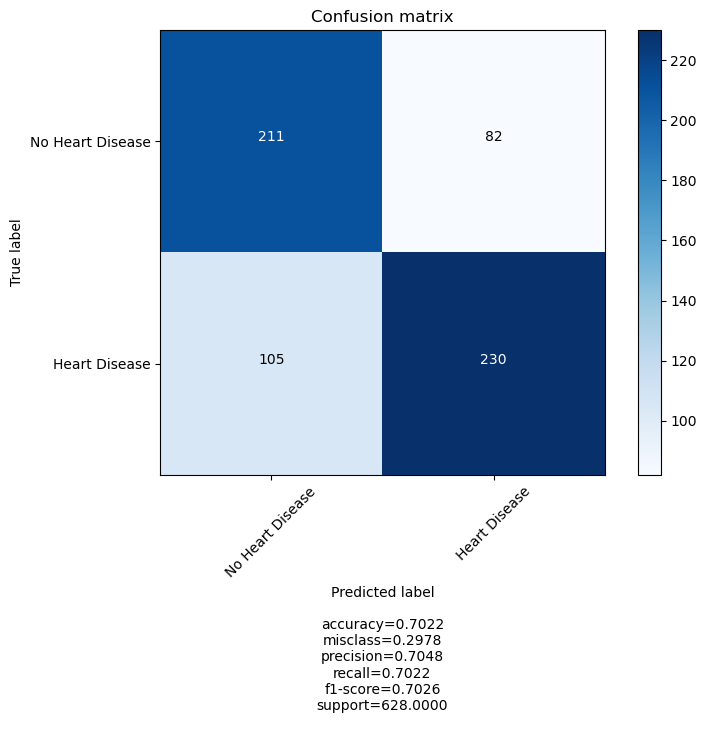

In [192]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Heart Disease", "Heart Disease"],
    normalize=False,
    class_results=class_report["weighted avg"],
)

In [193]:
# Plots the graph
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


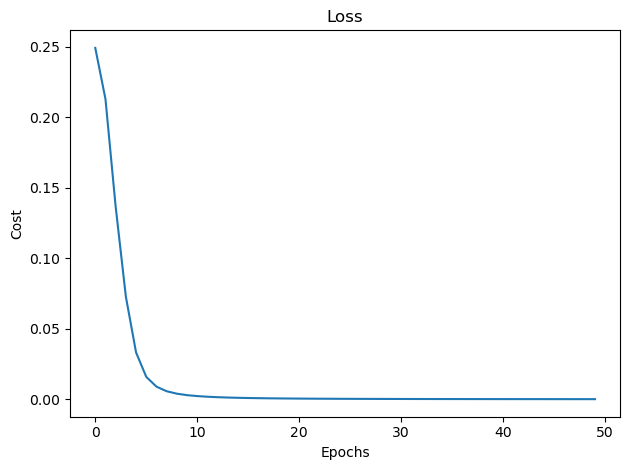

In [194]:
# Variables for determining the loss over epochs
epochs = model_history.epoch
loss = model_history.history["loss"]

# Plots the loss graph
plt.plot(epochs, loss)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Loss")

plt.tight_layout()

plt.show()

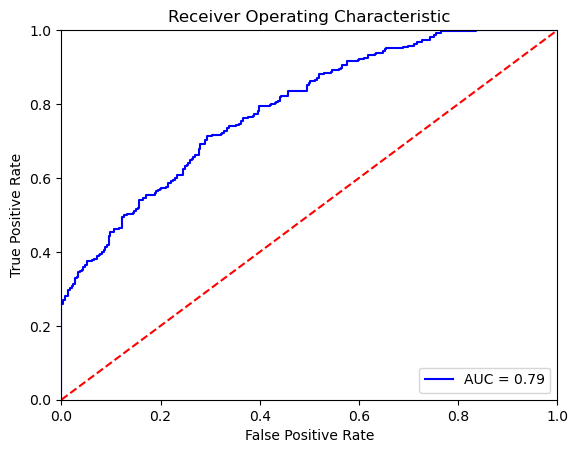

In [195]:
# Variables for determining the ROC/AUC
fpr, tpr, threshold = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

# Plots the ROC and AUC graph
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

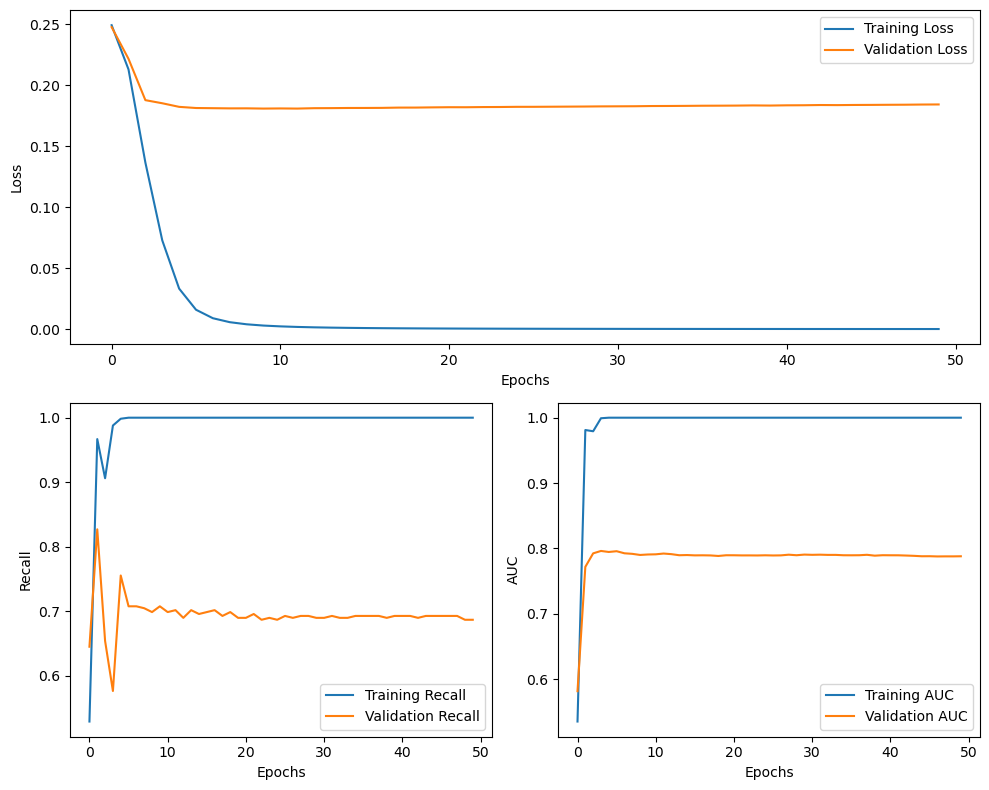

In [196]:
# Variables for plotting the training versus testing
train_loss = list(model_history.history.values())[0]
train_recall = list(model_history.history.values())[1]
train_auc = list(model_history.history.values())[2]
val_loss = list(model_history.history.values())[3]
val_recall = list(model_history.history.values())[4]
val_auc = list(model_history.history.values())[5]

# Plots the training versus testing graph
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, (1, 2))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_recall, label="Training Recall")
plt.plot(val_recall, label="Validation Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_auc, label="Training AUC")
plt.plot(val_auc, label="Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()

plt.tight_layout()

plt.show()

# Wide and Deep Network #3

For this network, we will add the stacked cross column to the categorical features to for making the layer wide.

In [197]:
# Wide and Deep Network #3

# Step 1: Define data that will be used. Data is converted into numpy format.

# For this network, we will add the stacked cross column to the categorical
# features to for making the layer wide.

# x training data for model
mod_x_train_categorical = x_train[
    categorical_features + [x_col_features[3]]
].to_numpy()
mod_x_train_continuous = x_train[continuous_features].to_numpy()

# x testing data for model
mod_x_test_categorical = x_test[
    categorical_features + [x_col_features[3]]
].to_numpy()
mod_x_test_continuous = x_test[continuous_features].to_numpy()

# Defines final x-train and x-test variables after all layers have been
# evaluated.
mod_x_train = [mod_x_train_categorical] + [mod_x_train_continuous]
mod_x_test = [mod_x_test_categorical] + [mod_x_test_continuous]

In [198]:
# Step 2: Define the inputs that will be used
input_categorical = Input(
    shape=(mod_x_train_categorical.shape[1],),
    dtype="int64",
    name="inputs_categorical",
)
input_continuous = Input(
    shape=(mod_x_train_continuous.shape[1],),
    dtype="int64",
    name="inputs_numeric",
)

In [199]:
# Step 3: Defines placeholder variables for data input

# Defines outputs
output_categorical = []
output_continuous  = []

# Defines branches
branch_wide  = []
branch_deep  = []
branch_final = []

In [200]:
# Step 5: Add embeddings for categorical data

# For categorical embeddings...
tmp_train = mod_x_train_categorical.T.tolist()
tmp_test = mod_x_test_categorical.T.tolist()
tmp_colnames = categorical_features

# Iterates through categorical variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_categorical, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_categorical.append(embedding)

In [201]:
# Step 6: Add dense layers to categorical input
cat_dense = Dense(units=25, activation="relu", name="cat_1")(input_categorical)

In [202]:
# Step 7: Add embeddings to wide placeholder 
wide = []
wide.append(cat_dense)
for embedding in output_categorical:
    wide.append(embedding)

In [203]:
# Step 8: Add dense layers to wide branch
branch_wide = keras.layers.concatenate(wide, name="wide_concat")
branch_wide = Dense(units=25, activation="relu", name="wide1")(branch_wide)

In [204]:
# Step 9: Add branch for continuous (numeric) data

# For continuous features...
# Adds dense layer to continuous input
x_dense = Dense(units=20, activation="relu", name="num_1")(input_continuous)
x_dense = Dense(units=10, activation="relu", name="num_2")(x_dense)
x_dense = Dense(units=5, activation="relu", name="num_3")(x_dense)

In [205]:
# Step 10: Add dense layer to deep branch
branch_deep.append(x_dense)

In [206]:
# Step 11: Merge the deep branches
branch_deep = keras.layers.concatenate(branch_deep, name="deep_concat")
branch_deep = Dense(units=50, activation="relu", name="deep1")(branch_deep)
branch_deep = Dense(units=25, activation="relu", name="deep2")(branch_deep)
branch_deep = Dense(units=10, activation="relu", name="deep3")(branch_deep)

In [207]:
# Step 12: Merge the deep and wide branches
branch_final = keras.layers.concatenate([branch_wide, branch_deep])

In [208]:
# Step 13: Add dense layer to final branch
branch_final = Dense(units=1, activation="sigmoid", name="combined")(
    branch_final
)

In [209]:
# Step 14: Build model
model = Model(
    inputs=[input_categorical, input_continuous],
    outputs=branch_final,
)

In [210]:
# Step 15: Compile model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC(from_logits=True)],
)

In [211]:
# Prints the model summary
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs_numeric (InputLayer  [(None, 5)]                  0         []                            
 )                                                                                                
                                                                                                  
 num_1 (Dense)               (None, 20)                   120       ['inputs_numeric[0][0]']      
                                                                                                  
 num_2 (Dense)               (None, 10)                   210       ['num_1[0][0]']               
                                                                                                  
 inputs_categorical (InputL  [(None, 4)]                  0         []                      

In [212]:
# Step 16: Fits model to training data
model_history = model.fit(
    mod_x_train,
    y_train,
    epochs=50,
    batch_size=50,
    validation_data=([mod_x_test], y_test),
    verbose=1,
)

Epoch 1/50
51/51 [==============================] - 2s 8ms/step - loss: 0.5030 - recall_4: 0.3976 - auc_2: 0.4911 - val_loss: 0.5334 - val_recall_4: 0.0000e+00 - val_auc_2: 0.5000
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4916 - recall_4: 0.0000e+00 - auc_2: 0.5000 - val_loss: 0.5334 - val_recall_4: 0.0000e+00 - val_auc_2: 0.5000
Epoch 3/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4916 - recall_4: 0.0000e+00 - auc_2: 0.5000 - val_loss: 0.5334 - val_recall_4: 0.0000e+00 - val_auc_2: 0.5000
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4916 - recall_4: 0.0000e+00 - auc_2: 0.5000 - val_loss: 0.5334 - val_recall_4: 0.0000e+00 - val_auc_2: 0.5000
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4916 - recall_4: 0.0000e+00 - auc_2: 0.5000 - val_loss: 0.5334 - val_recall_4: 0.0000e+00 - val_auc_2: 0.5000
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4916 - rec

51/51 [==============================] - 0s 4ms/step - loss: 0.4730 - recall_4: 0.0923 - auc_2: 0.5170 - val_loss: 0.4990 - val_recall_4: 0.0716 - val_auc_2: 0.5308
Epoch 46/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4601 - recall_4: 0.0737 - auc_2: 0.5320 - val_loss: 0.4892 - val_recall_4: 0.1015 - val_auc_2: 0.5391
Epoch 47/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4538 - recall_4: 0.0996 - auc_2: 0.5374 - val_loss: 0.4644 - val_recall_4: 0.1881 - val_auc_2: 0.5620
Epoch 48/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4103 - recall_4: 0.2777 - auc_2: 0.5831 - val_loss: 0.4217 - val_recall_4: 0.2806 - val_auc_2: 0.6000
Epoch 49/50
51/51 [==============================] - 0s 4ms/step - loss: 0.3997 - recall_4: 0.2453 - auc_2: 0.5941 - val_loss: 0.3946 - val_recall_4: 0.3522 - val_auc_2: 0.6184
Epoch 50/50
51/51 [==============================] - 0s 4ms/step - loss: 0.3550 - recall_4: 0.4040 - auc_2: 0.6407 - val_loss: 

## Wide and Deep Network #3 Visualization

In [213]:
# Defines the y-prediction probability and y-prediction arrays
y_predict_proba = model.predict(mod_x_test)  # sigmoid output probabilities
y_predict = np.round(y_predict_proba)  # round to get binary class

# Prints classification report
print(classification_report(y_test, y_predict))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.57      0.84      0.68       293
           1       0.76      0.44      0.56       335

    accuracy                           0.63       628
   macro avg       0.66      0.64      0.62       628
weighted avg       0.67      0.63      0.61       628



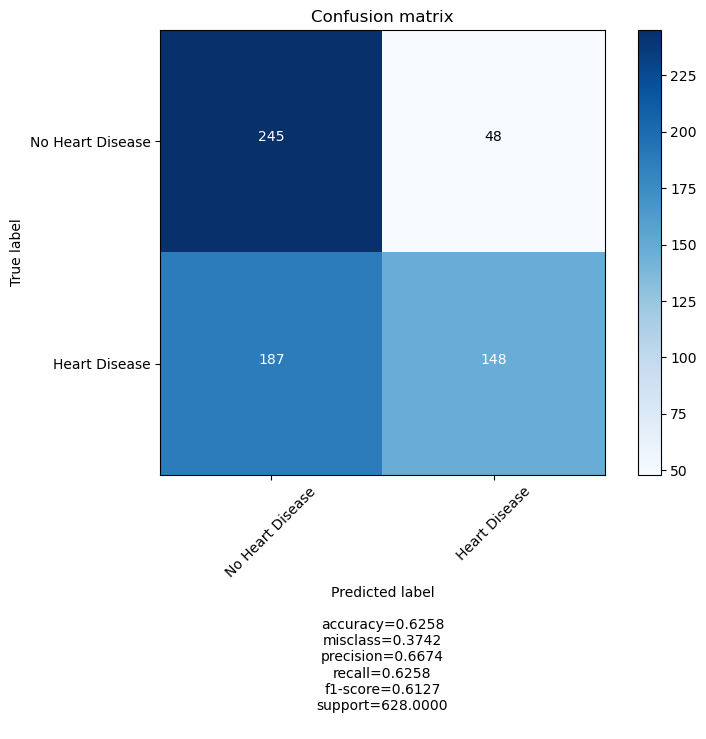

In [214]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Heart Disease", "Heart Disease"],
    normalize=False,
    class_results=class_report["weighted avg"],
)

In [215]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


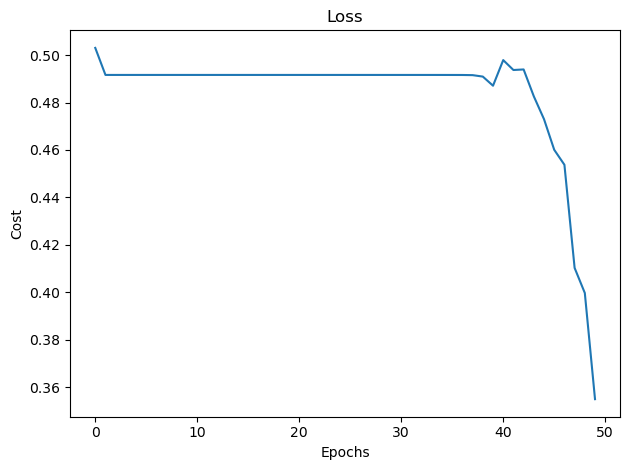

In [216]:
# Variables for determining the loss over epochs
epochs = model_history.epoch
loss = model_history.history["loss"]

# Plots the loss graph
plt.plot(epochs, loss)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Loss")

plt.tight_layout()

plt.show()

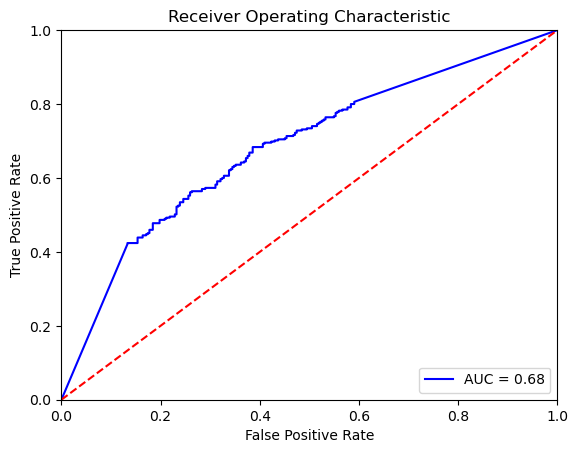

In [217]:
# Variables for determining the ROC/AUC
fpr, tpr, threshold = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

# Plots the ROC and AUC graph
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

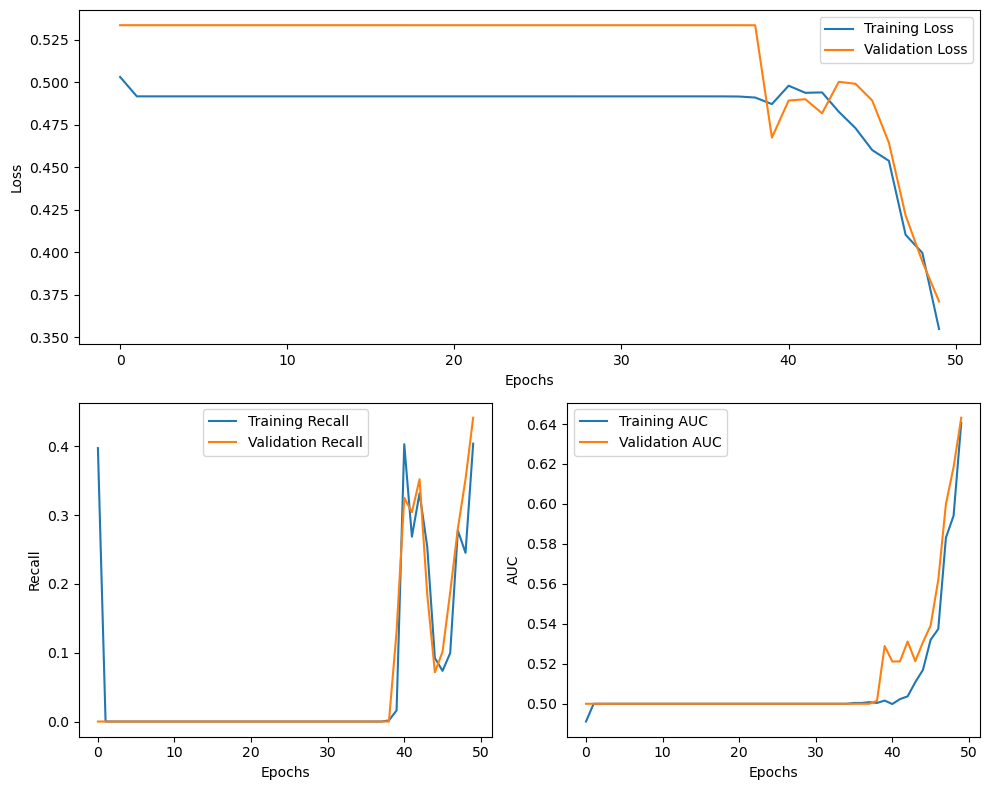

In [218]:
# Model history values
hist_values = list(model_history.history.values())

# Variables for plotting the training versus testing
train_loss   = hist_values[0]
train_recall = hist_values[1]
train_auc    = hist_values[2]
val_loss     = hist_values[3]
val_recall   = hist_values[4]
val_auc      = hist_values[5]

# Plots the training versus testing graph
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, (1, 2))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_recall, label="Training Recall")
plt.plot(val_recall, label="Validation Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_auc, label="Training AUC")
plt.plot(val_auc, label="Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()

plt.tight_layout()

plt.show()

In [219]:
# Evaluating performance of the standard Multi-Layer Perceptron (MLP)
mlp_model = MLPClassifier(
    random_state=123, max_iter=50
)
model_history = mlp_model.fit(
    x_train.loc[:, ~x_train.columns.isin([x_col_features[-1]])], y_train
)
y_predict = mlp_model.predict(x_test.loc[:, ~x_test.columns.isin([x_col_features[-1]])])


In [220]:
# Defines the y-prediction probability and y-prediction arrays
y_predict_proba = mlp_model.predict(x_test.loc[:, ~x_test.columns.isin([x_col_features[-1]])])
y_predict = np.round(y_predict_proba)

# Prints classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.48      0.98      0.65       293
           1       0.82      0.07      0.13       335

    accuracy                           0.50       628
   macro avg       0.65      0.53      0.39       628
weighted avg       0.66      0.50      0.37       628



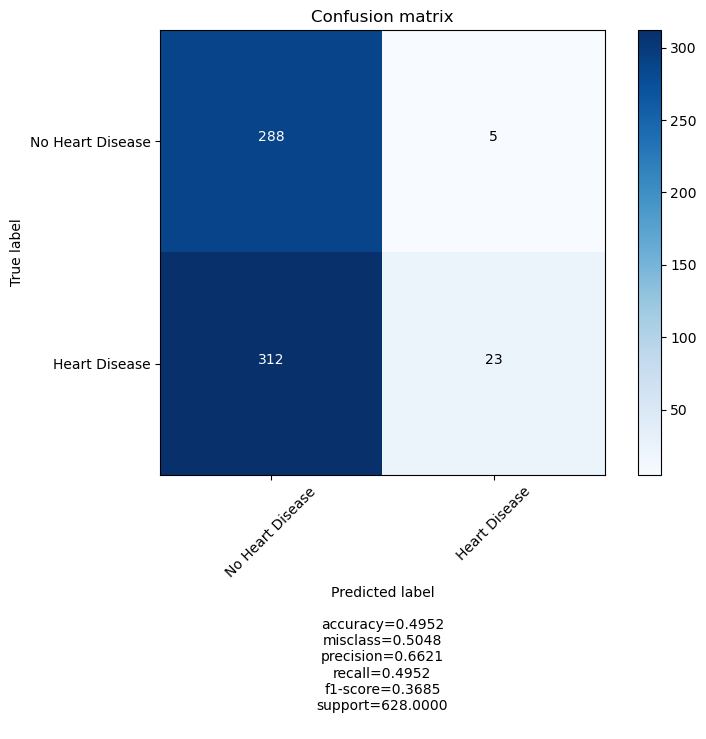

In [221]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Heart Disease", "Heart Disease"],
    normalize=False,
    class_results=class_report["weighted avg"],
)

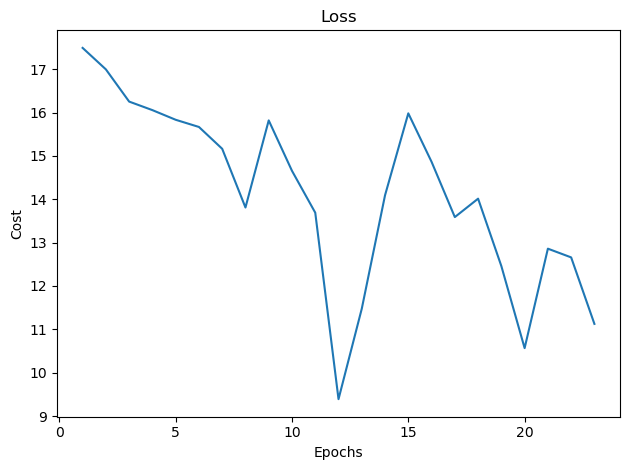

In [222]:
# Variables for determining the loss over epochs
epochs = [i + 1 for i in range(len(model_history.loss_curve_))]
loss = model_history.loss_curve_

# Plots the loss graph
plt.plot(epochs, loss)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Loss")

plt.tight_layout()

plt.show()

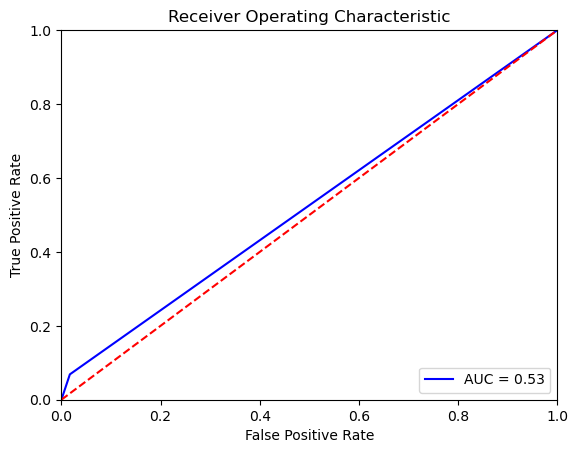

In [223]:
# Variables for determining the ROC/AUC
fpr, tpr, threshold = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

# Plots the ROC and AUC graph
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Wide and Deep Network #4

In [224]:
# Wide and Deep Network #4 - Capture the embedding weights from the
# deep network and perform dimensionality reduction on the output of these
# embedding layers.

# Step 1: Define data that will be used. Data is converted into numpy format.

# x training data for model
mod_x_train_cross = x_train[x_col_features[:3]].to_numpy()
mod_x_train_categorical = x_train[categorical_features].to_numpy()
mod_x_train_continuous = x_train[
    continuous_features + [x_col_features[-1]]
].to_numpy()

# x testing data for model
mod_x_test_cross = x_test[x_col_features[:3]].to_numpy()
mod_x_test_categorical = x_test[categorical_features].to_numpy()
mod_x_test_continuous = x_test[
    continuous_features + [x_col_features[-1]]
].to_numpy()

# Defines final x-train and x-test variables after all layers have been
# evaluated.
mod_x_train = (
    [mod_x_train_cross] + [mod_x_train_categorical] + [mod_x_train_continuous]
)
mod_x_test = (
    [mod_x_test_cross] + [mod_x_test_categorical] + [mod_x_test_continuous]
)

In [225]:
# Step 2: Define the inputs that will be used
input_cross = Input(
    shape=(mod_x_train_cross.shape[1],), dtype="int64", name="inputs_wide"
)
input_categorical = Input(
    shape=(mod_x_train_categorical.shape[1],),
    dtype="int64",
    name="inputs_categorical",
)
input_continuous = Input(
    shape=(mod_x_train_continuous.shape[1],),
    dtype="int64",
    name="inputs_numeric",
)
input_reduced_dimensions = Input(
    shape=(mod_x_train_categorical.shape[1],),
    dtype="int64",
    name="inputs_embed_dim_reduced",
)

In [226]:
# Step 3: Define placeholder variables for data input

# Defines outputs
output_cross = []
output_categorical = []
output_continuous = []

# Defines branches
branch_wide = []
branch_deep = []
branch_final = []

In [227]:
# Step 4: Add embeddings for crossed data

# For cross data embeddings...
tmp_train = mod_x_train_cross.T.tolist()
tmp_test = mod_x_test_cross.T.tolist()
tmp_colnames = x_col_features[: mod_x_train_cross.shape[1]]

# Iterates through cross variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_cross, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_cross.append(embedding)

In [228]:
# Step 5: Add embeddings for categorical data

# For categorical embeddings...
tmp_train = mod_x_train_categorical.T.tolist()
tmp_test = mod_x_test_categorical.T.tolist()
tmp_colnames = categorical_features

# Iterates through categorical variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_categorical, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_categorical.append(embedding)

In [229]:
# Step 6: Add embeddings to wide branch. Here, the embedded weights are 
# named so that the embedding weights can be retrieved later.
branch_cross = keras.layers.concatenate(output_cross, name="embed_cross")
branch_cross = Dense(units=20, activation="sigmoid", name="cross_dim_reduc_1")(
    branch_cross
)

branch_cat = keras.layers.concatenate(output_categorical, name="embed_categorical")
branch_cat = Dense(units=20, activation="sigmoid", name="cat_dim_reduc_1")(
    branch_cat
)

branch_wide = keras.layers.concatenate(
    [branch_cross, branch_cat], name="concat_embeds"
)
branch_wide = Dense(units=20, activation="sigmoid", name="concat_embeds_1")(
    branch_wide
)

In [230]:
# Step 7: Add branch for continuous (numeric) data

# For continuous features...
# Adds dense layer to continuous input
x_dense = Dense(units=20, activation="relu", name="num_1")(input_continuous)
x_dense = Dense(units=10, activation="relu", name="num_2")(x_dense)
x_dense = Dense(units=5, activation="relu", name="num_3")(x_dense)

In [231]:
# Step 8: Add dense layer to deep branch
branch_deep.append(x_dense)
branch_deep.append(branch_cross)

In [232]:
# Step 9: Merge the deep branches
branch_deep = keras.layers.concatenate(branch_deep, name="concat_conts")
branch_deep = Dense(units=50, activation="relu", name="deep1")(branch_deep)
branch_deep = Dense(units=25, activation="relu", name="deep2")(branch_deep)
branch_deep = Dense(units=10, activation="relu", name="deep3")(branch_deep)

In [233]:
# Step 10: Merge the deep and wide branches
branch_final = keras.layers.concatenate([branch_wide, branch_deep])

In [234]:
# Step 10: Add dense layer to final branch
branch_final = Dense(units=10, activation="sigmoid", name="combined")(
    branch_final
)
branch_final = Dense(units=1, activation="sigmoid", name="combined_f")(
    branch_final
)

In [235]:
# Step 11: Build model
model = Model(
    inputs=[input_cross, input_categorical, input_continuous],
    outputs=branch_final,
)

In [236]:
# Step 12: Compile model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC(from_logits=True)],
)

In [237]:
# Prints the model summary
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs_wide (InputLayer)    [(None, 3)]                  0         []                            
                                                                                                  
 tf.compat.v1.gather_14 (TF  (None,)                      0         ['inputs_wide[0][0]']         
 OpLambda)                                                                                        
                                                                                                  
 tf.compat.v1.gather_15 (TF  (None,)                      0         ['inputs_wide[0][0]']         
 OpLambda)                                                                                        
                                                                                            

                                                                                                  
 concatenate_3 (Concatenate  (None, 30)                   0         ['concat_embeds_1[0][0]',     
 )                                                                   'deep3[0][0]']               
                                                                                                  
 combined (Dense)            (None, 10)                   310       ['concatenate_3[0][0]']       
                                                                                                  
 combined_f (Dense)          (None, 1)                    11        ['combined[0][0]']            
                                                                                                  
Total params: 569432 (2.17 MB)
Trainable params: 569432 (2.17 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [238]:
# Step 13: Fits model to training data
model_history = model.fit(
    mod_x_train,
    y_train,
    epochs=50,
    batch_size=50,
    validation_data=([mod_x_test], y_test),
    verbose=1,
)

Epoch 1/50
51/51 [==============================] - 2s 11ms/step - loss: 0.2526 - recall_5: 0.1773 - auc_3: 0.4842 - val_loss: 0.2517 - val_recall_5: 1.0000 - val_auc_3: 0.4799
Epoch 2/50
51/51 [==============================] - 0s 6ms/step - loss: 0.2510 - recall_5: 0.1409 - auc_3: 0.5120 - val_loss: 0.2491 - val_recall_5: 1.0000 - val_auc_3: 0.5134
Epoch 3/50
51/51 [==============================] - 0s 6ms/step - loss: 0.2516 - recall_5: 0.2591 - auc_3: 0.4871 - val_loss: 0.2514 - val_recall_5: 0.0537 - val_auc_3: 0.4863
Epoch 4/50
51/51 [==============================] - 0s 6ms/step - loss: 0.2492 - recall_5: 0.0915 - auc_3: 0.5243 - val_loss: 0.2506 - val_recall_5: 0.1254 - val_auc_3: 0.4982
Epoch 5/50
51/51 [==============================] - 0s 6ms/step - loss: 0.2224 - recall_5: 0.6713 - auc_3: 0.7976 - val_loss: 0.2635 - val_recall_5: 0.0537 - val_auc_3: 0.5009
Epoch 6/50
51/51 [==============================] - 0s 6ms/step - loss: 0.0444 - recall_5: 0.9960 - auc_3: 0.9998 - val

Epoch 47/50
51/51 [==============================] - 0s 6ms/step - loss: 3.3369e-04 - recall_5: 1.0000 - auc_3: 1.0000 - val_loss: 0.3950 - val_recall_5: 0.3134 - val_auc_3: 0.4999
Epoch 48/50
51/51 [==============================] - 0s 6ms/step - loss: 3.1979e-04 - recall_5: 1.0000 - auc_3: 1.0000 - val_loss: 0.3954 - val_recall_5: 0.3164 - val_auc_3: 0.5008
Epoch 49/50
51/51 [==============================] - 0s 6ms/step - loss: 3.0665e-04 - recall_5: 1.0000 - auc_3: 1.0000 - val_loss: 0.3961 - val_recall_5: 0.3164 - val_auc_3: 0.5018
Epoch 50/50
51/51 [==============================] - 0s 6ms/step - loss: 2.9420e-04 - recall_5: 1.0000 - auc_3: 1.0000 - val_loss: 0.3971 - val_recall_5: 0.3134 - val_auc_3: 0.5007


## Wide and Deep Network #4 Visualization

In [239]:
# Defines the y-prediction probability and y-prediction arrays
y_predict_proba = model.predict(mod_x_test)  # sigmoid output probabilities
y_predict = np.round(y_predict_proba)  # round to get binary class

# Prints classification report
print(classification_report(y_test, y_predict))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.47      0.70      0.56       293
           1       0.54      0.31      0.40       335

    accuracy                           0.49       628
   macro avg       0.51      0.51      0.48       628
weighted avg       0.51      0.49      0.47       628



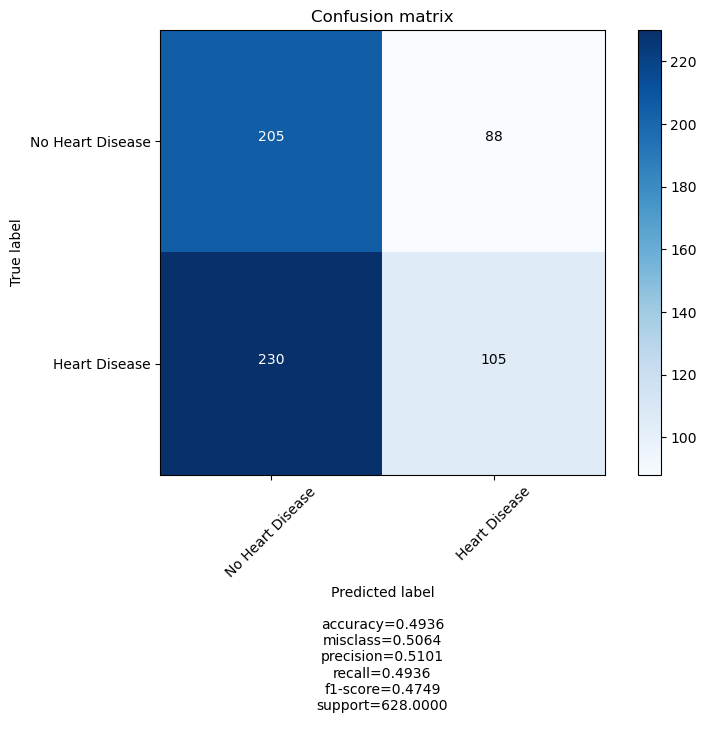

In [240]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Heart Disease", "Heart Disease"],
    normalize=False,
    class_results=class_report["weighted avg"],
)

In [241]:
# Plots the graph
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Dimensionality Reduction

In [242]:
for layer in model.layers:
    name = layer.name
    weights_and_bias = layer.get_weights()
    if len(weights_and_bias) == 2:
        weights, bias = weights_and_bias
        print(f"----- {name} -----")
        print(f"Weights Shape: {weights.shape}")
        print(f"Bias Shape: {bias.shape}")

----- num_1 -----
Weights Shape: (6, 20)
Bias Shape: (20,)
----- num_2 -----
Weights Shape: (20, 10)
Bias Shape: (10,)
----- cross_dim_reduc_1 -----
Weights Shape: (162, 20)
Bias Shape: (20,)
----- num_3 -----
Weights Shape: (10, 5)
Bias Shape: (5,)
----- cat_dim_reduc_1 -----
Weights Shape: (51, 20)
Bias Shape: (20,)
----- deep1 -----
Weights Shape: (25, 50)
Bias Shape: (50,)
----- deep2 -----
Weights Shape: (50, 25)
Bias Shape: (25,)
----- concat_embeds_1 -----
Weights Shape: (40, 20)
Bias Shape: (20,)
----- deep3 -----
Weights Shape: (25, 10)
Bias Shape: (10,)
----- combined -----
Weights Shape: (30, 10)
Bias Shape: (10,)
----- combined_f -----
Weights Shape: (10, 1)
Bias Shape: (1,)


In [243]:
layer = model.get_layer("type_chest_pain_embed")
x_coords = layer.get_weights()[0][:, 0]
y_coords = layer.get_weights()[0][:, 1]
plt.scatter(x_coords, y_coords)
for label, x, y in zip(
    df["type_chest_pain"].unique().tolist(), x_coords, y_coords
):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-1, 1),
        textcoords="offset points",
        ha="right",
        va="bottom",
    )

plt.show()

ValueError: No such layer: type_chest_pain_embed. Existing layers are: ['inputs_wide', 'tf.compat.v1.gather_14', 'tf.compat.v1.gather_15', 'tf.compat.v1.gather_16', 'inputs_numeric', 'confirmed_cases_X_deaths_embed', 'total_pop_X_median_age_X_cases_per_1000_embed', 'total_pop_X_median_age_X_deaths_per_1000_embed', 'inputs_categorical', 'num_1', 'embed_cross', 'tf.compat.v1.gather_17', 'tf.compat.v1.gather_18', 'tf.compat.v1.gather_19', 'num_2', 'cross_dim_reduc_1', 'county_name_embed', 'state_embed', 'deaths_embed', 'num_3', 'embed_categorical', 'concat_conts', 'cat_dim_reduc_1', 'deep1', 'concat_embeds', 'deep2', 'concat_embeds_1', 'deep3', 'concatenate_3', 'combined', 'combined_f'].

In [244]:
layer = model.get_layer("resting_ecg_embed")
x_coords = layer.get_weights()[0][:, 0]
y_coords = [1, 1, 1]
plt.scatter(x_coords, y_coords)
for label, x, y in zip(
    df["resting_ecg"].unique().tolist(), x_coords, y_coords
):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-1, 1),
        textcoords="offset points",
        ha="right",
        va="bottom",
    )

plt.show()

ValueError: No such layer: resting_ecg_embed. Existing layers are: ['inputs_wide', 'tf.compat.v1.gather_14', 'tf.compat.v1.gather_15', 'tf.compat.v1.gather_16', 'inputs_numeric', 'confirmed_cases_X_deaths_embed', 'total_pop_X_median_age_X_cases_per_1000_embed', 'total_pop_X_median_age_X_deaths_per_1000_embed', 'inputs_categorical', 'num_1', 'embed_cross', 'tf.compat.v1.gather_17', 'tf.compat.v1.gather_18', 'tf.compat.v1.gather_19', 'num_2', 'cross_dim_reduc_1', 'county_name_embed', 'state_embed', 'deaths_embed', 'num_3', 'embed_categorical', 'concat_conts', 'cat_dim_reduc_1', 'deep1', 'concat_embeds', 'deep2', 'concat_embeds_1', 'deep3', 'concatenate_3', 'combined', 'combined_f'].

----- cross_dim_reduc_1 -----
Weights Shape: (162, 20)
Bias Shape: (20,)


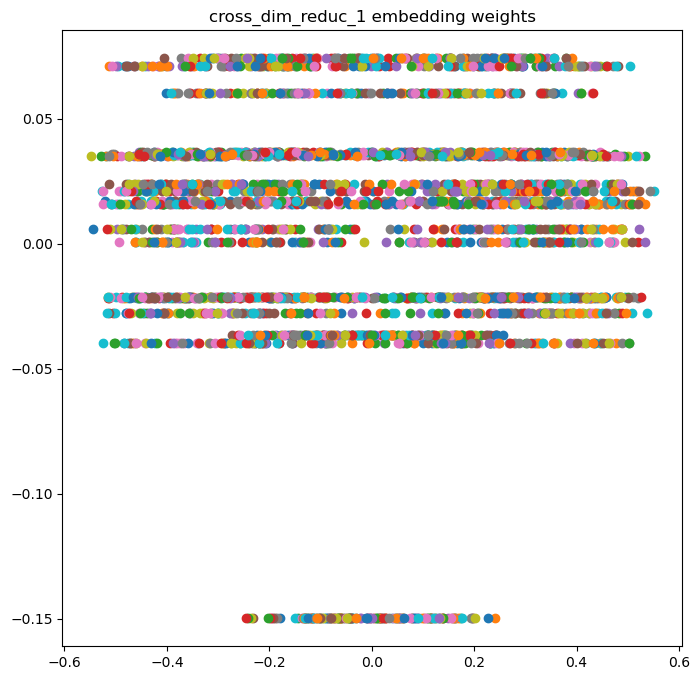

In [245]:
plt.figure(figsize=(8, 8))
layer = model.get_layer("cross_dim_reduc_1")
name = layer.name
weights_and_bias = layer.get_weights()
if len(weights_and_bias) == 2:
    weights, bias = weights_and_bias
    print(f"----- {name} -----")
    print(f"Weights Shape: {weights.shape}")
    print(f"Bias Shape: {bias.shape}")
    for weight in weights:
        plt.plot(weight, bias, 'o')

plt.title(name + " embedding weights")
plt.show()

----- cat_dim_reduc_1 -----
Weights Shape: (51, 20)
Bias Shape: (20,)


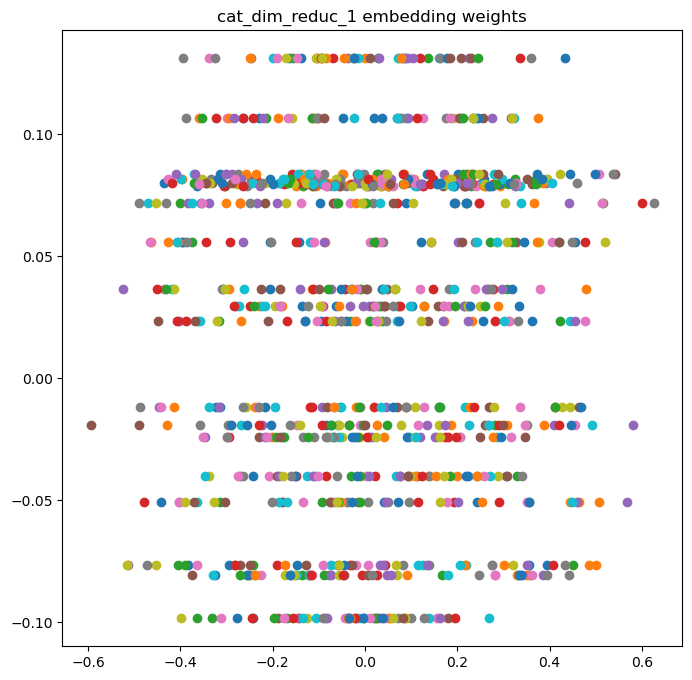

In [246]:
plt.figure(figsize=(8, 8))
layer = model.get_layer("cat_dim_reduc_1")
name = layer.name
weights_and_bias = layer.get_weights()
if len(weights_and_bias) == 2:
    weights, bias = weights_and_bias
    print(f"----- {name} -----")
    print(f"Weights Shape: {weights.shape}")
    print(f"Bias Shape: {bias.shape}")
    for weight in weights:
        plt.plot(weight, bias, 'o')

plt.title(name + " embedding weights")
plt.show()

----- concat_embeds_1 -----
Weights Shape: (40, 20)
Bias Shape: (20,)


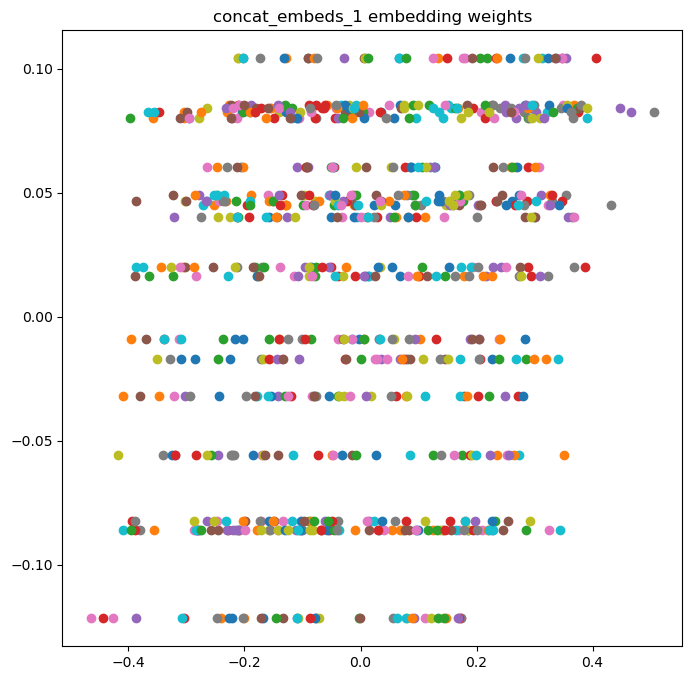

In [247]:
plt.figure(figsize=(8, 8))
layer = model.get_layer("concat_embeds_1")
name = layer.name
weights_and_bias = layer.get_weights()
if len(weights_and_bias) == 2:
    weights, bias = weights_and_bias
    print(f"----- {name} -----")
    print(f"Weights Shape: {weights.shape}")
    print(f"Bias Shape: {bias.shape}")
    for weight in weights:
        plt.plot(weight, bias, 'o')

plt.title(name + " embedding weights")
plt.show()

# Conclusion

# References